In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/Rabona/output_transformer/enc_test_256.npy')
stim_resp = np.load('/mnt/cube/Rabona/output_transformer/resp_test_256.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((5706, 256), (5706, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=256, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 256

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((5706, 256), (5706, 214))

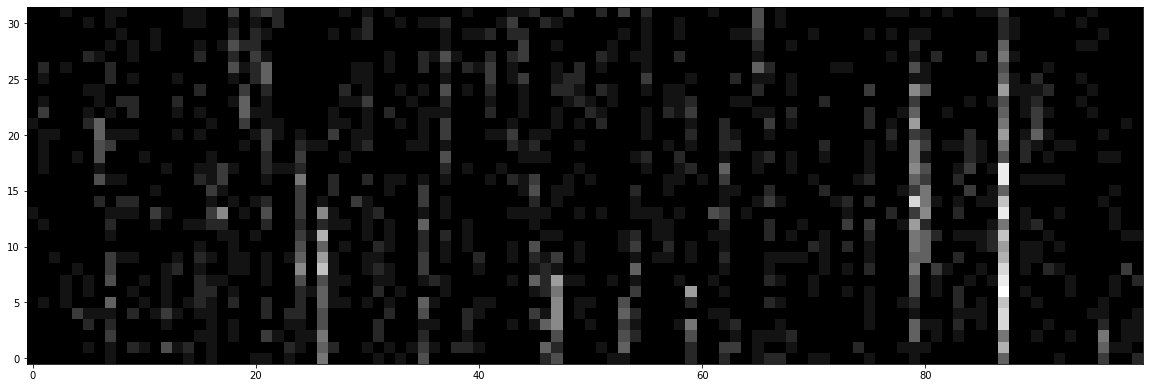

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process_B1240.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/transformer_model/B1240/32x32/stim_resp_32x32_256/test_set_mne/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 256
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.168941
    2       0    0.169351
    3       0    0.170829
    4       1    0.170442
    5       2    0.174040
    6       3    0.173330
    7       4    0.171162
    8       5    0.170332
    9       6    0.171962
   10       7    0.171392
   11       8    0.168612
   12       0    0.171861
   13       1    0.171449
   14       2    0.169219
   15       3    0.166542
   16       0    0.166823
   17       1    0.167995
   18       2    0.167634
   19       3    0.166430
   20       0    0.166523
   21       1    0.168173
   22       2    0.167219
   23       3    0.167685
   24       4    0.168674
   25       5    0.168289
   26       6    0.166532
   27       7    0.166341
   28       0    0.165731
   29       0    0.166071
   30       1    0.166773
   31       2    0.166418
   32       3    0.165193
   33       0    0.165857
   34       1    0.166878
   35       2    0.167508
   36       3    0.166771
   37       4    0.167679
   38       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.159125
    2       0    0.162273
    3       0    0.164183
    4       1    0.162546
    5       2    0.161687
    6       0    0.157988
    7       0    0.157480
    8       0    0.157743
    9       1    0.156679
   10       0    0.155187
   11       0    0.155802
   12       1    0.158307
   13       2    0.158136
   14       3    0.157445
   15       4    0.156435
   16       5    0.156337
   17       6    0.157158
   18       7    0.157790
   19       8    0.156713
   20       9    0.156355
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.154539
    2       0    0.155406
    3       0    0.153180
    4       0    0.156902
    5       1    0.155818
    6       2    0.150302
    7       0    0.150165
    8       0    0.154927
    9       1    0.153727
   10       2    0.151505
   11       3    0.152845
   12       4    0.151596
   13       5    0.149092
   14       0    0.151018
   15       1    0.150380
   16       2    0.151602
   17       3    0.150784
   18       4    0.150932
   19       5    0.152159
   20       6    0.150936
   21       7    0.151192
   22       8    0.152764
   23       9    0.150667
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.148813
    2       0    0.149820
    3       0    0.155109
    4       1    0.153436
    5       2    0.150760
    6       3    0.149476
    7       0    0.148342
    8       0    0.147286
    9       0    0.146369
   10       0    0.146088
   11       0    0.146402
   12       1    0.146925
   13       2    0.145775
   14       0    0.144695
   15       0    0.144328
   16       0    0.144392
   17       1    0.144052
   18       0    0.143982
   19       0    0.144313
   20       1    0.144255
   21       2    0.145986
   22       3    0.144596
   23       4    0.144994
   24       5    0.145817
   25       6    0.147332
   26       7    0.148275
   27       8    0.148583
   28       9    0.148383
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.171198
    2       0    0.165346
    3       0    0.165767
    4       1    0.166032
    5       2    0.162495
    6       0    0.160981
    7       0    0.161307
    8       1    0.159673
    9       0    0.159298
   10       0    0.159113
   11       0    0.157631
   12       0    0.156787
   13       0    0.157110
   14       1    0.158157
   15       2    0.159375
   16       3    0.157225
   17       4    0.158411
   18       5    0.157910
   19       6    0.157856
   20       7    0.157133
   21       8    0.156572
   22       0    0.157649
   23       1    0.156193
   24       0    0.155562
   25       0    0.156039
   26       1    0.155397
   27       0    0.155736
   28       1    0.155500
   29       2    0.154715
   30       0    0.155380
   31       1    0.155896
   32       2    0.157818
   33       3    0.156314
   34       4    0.156619
   35       5    0.157711
   36       6    0.156657
   37       7    0.156069
   38       8    0.155861
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.150302
    2       0    0.148189
    3       0    0.145662
    4       0    0.142863
    5       0    0.145498
    6       1    0.151039
    7       2    0.151134
    8       3    0.148301
    9       4    0.148640
   10       5    0.151126
   11       6    0.150990
   12       7    0.149903
   13       8    0.146097
   14       9    0.147261
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.146636
    2       0    0.142416
    3       0    0.141918
    4       0    0.140967
    5       0    0.140447
    6       0    0.138990
    7       0    0.138181
    8       0    0.138135
    9       0    0.137907
   10       0    0.137087
   11       0    0.136541
   12       0    0.138023
   13       1    0.137379
   14       2    0.136049
   15       0    0.136443
   16       1    0.136118
   17       2    0.135284
   18       0    0.134777
   19       0    0.134793
   20       1    0.134307
   21       0    0.134211
   22       0    0.134066
   23       0    0.133729
   24       0    0.133287
   25       0    0.133024
   26       0    0.133307
   27       1    0.133230
   28       2    0.132556
   29       0    0.132360
   30       0    0.132503
   31       1    0.132426
   32       2    0.132211
   33       0    0.132328
   34       1    0.132303
   35       2    0.131150
   36       0    0.130723
   37       0    0.132147
   38       1    0.132628
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.150739
    2       0    0.148528
    3       0    0.148067
    4       0    0.146855
    5       0    0.146171
    6       0    0.145639
    7       0    0.143980
    8       0    0.144231
    9       1    0.145321
   10       2    0.144772
   11       3    0.143131
   12       0    0.143644
   13       1    0.143165
   14       2    0.143607
   15       3    0.142586
   16       0    0.142650
   17       1    0.142795
   18       2    0.142232
   19       0    0.142476
   20       1    0.142934
   21       2    0.142668
   22       3    0.142321
   23       4    0.143048
   24       5    0.143010
   25       6    0.142490
   26       7    0.143581
   27       8    0.144052
   28       9    0.146053
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.113221
    2       0    0.112481
    3       0    0.113239
    4       1    0.112080
    5       0    0.111186
    6       0    0.110940
    7       0    0.110157
    8       0    0.110050
    9       

    1       0    0.100915
    2       0    0.100115
    3       0    0.099440
    4       0    0.098771
    5       0    0.098273
    6       0    0.098686
    7       1    0.098324
    8       2    0.097637
    9       0    0.096498
   10       0    0.096092
   11       0    0.095705
   12       0    0.095025
   13       0    0.095152
   14       1    0.094918
   15       0    0.094750
   16       0    0.094678
   17       0    0.095135
   18       1    0.095184
   19       2    0.094449
   20       0    0.094121
   21       0    0.094102
   22       0    0.093991
   23       0    0.093775
   24       0    0.093701
   25       0    0.093787
   26       1    0.093749
   27       2    0.093841
   28       3    0.093788
   29       4    0.094283
   30       5    0.094289
   31       6    0.094357
   32       7    0.094599
   33       8    0.094581
   34       9    0.094346
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093371
    2       0    0.091787
    3       

   18       2    0.106736
   19       3    0.106710
   20       4    0.106702
   21       5    0.107016
   22       6    0.106656
   23       7    0.106443
   24       8    0.106454
   25       9    0.106048
   26       0    0.106345
   27       1    0.106227
   28       2    0.105667
   29       0    0.105665
   30       0    0.105140
   31       0    0.105620
   32       1    0.106229
   33       2    0.106120
   34       3    0.105409
   35       4    0.105316
   36       5    0.106527
   37       6    0.106192
   38       7    0.106106
   39       8    0.105931
   40       9    0.105627
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.101015
    2       0    0.099831
    3       0    0.099814
    4       0    0.099863
    5       1    0.099522
    6       0    0.098621
    7       0    0.098288
    8       0    0.097924
    9       0    0.099175
   10       1    0.099312
   11       2    0.098269
   12       3    0.097798
   13       0    0.097614
   14       

   27       8    0.121121
   28       0    0.121268
   29       1    0.121411
   30       2    0.121094
   31       0    0.121138
   32       1    0.121586
   33       2    0.121827
   34       3    0.122521
   35       4    0.122801
   36       5    0.123339
   37       6    0.122840
   38       7    0.122720
   39       8    0.122669
   40       9    0.122671
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.127017
    2       0    0.127699
    3       0    0.123925
    4       0    0.121446
    5       0    0.121608
    6       1    0.120368
    7       0    0.120140
    8       0    0.119993
    9       0    0.119676
   10       0    0.120194
   11       1    0.119688
   12       2    0.119474
   13       0    0.119063
   14       0    0.118753
   15       0    0.118394
   16       0    0.117678
   17       0    0.117911
   18       1    0.117903
   19       2    0.117934
   20       3    0.117668
   21       0    0.117876
   22       1    0.118251
   23       

   24       3    0.293797
   25       4    0.293124
   26       5    0.293145
   27       6    0.293391
   28       7    0.294056
   29       8    0.294126
   30       9    0.294640
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111839
    2       0    0.108416
    3       0    0.107209
    4       0    0.107006
    5       0    0.106592
    6       0    0.107005
    7       1    0.108737
    8       2    0.107549
    9       3    0.107074
   10       4    0.105720
   11       0    0.104989
   12       0    0.105179
   13       1    0.104588
   14       0    0.104694
   15       1    0.104857
   16       2    0.104471
   17       0    0.104502
   18       1    0.104631
   19       2    0.104076
   20       0    0.104114
   21       1    0.104358
   22       2    0.104543
   23       3    0.104402
   24       4    0.104774
   25       5    0.105190
   26       6    0.105091
   27       7    0.105187
   28       8    0.104668
   29       9    0.104922
minimum of t

   15       1    0.180943
   16       2    0.180384
   17       3    0.179958
   18       0    0.179686
   19       0    0.179805
   20       1    0.179961
   21       2    0.180298
   22       3    0.179510
   23       0    0.179083
   24       0    0.179918
   25       1    0.180469
   26       2    0.179788
   27       3    0.179424
   28       4    0.179044
   29       0    0.178955
   30       0    0.179133
   31       1    0.179180
   32       2    0.179325
   33       3    0.179232
   34       4    0.179259
   35       5    0.179403
   36       6    0.179276
   37       7    0.179498
   38       8    0.179480
   39       9    0.179170
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.161697
    2       0    0.160988
    3       0    0.160267
    4       0    0.159676
    5       0    0.159348
    6       0    0.158844
    7       0    0.158378
    8       0    0.158336
    9       0    0.158181
   10       0    0.158153
   11       0    0.158424
   12       

    8       0    0.614917
    9       0    0.614347
   10       0    0.613807
   11       0    0.614281
   12       1    0.615141
   13       2    0.613606
   14       0    0.614143
   15       1    0.613582
   16       0    0.613471
   17       0    0.615045
   18       1    0.615164
   19       2    0.615248
   20       3    0.615270
   21       4    0.615192
   22       5    0.615073
   23       6    0.615158
   24       7    0.615024
   25       8    0.614948
   26       9    0.615172
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.147236
    2       0    0.145217
    3       0    0.142090
    4       0    0.139237
    5       0    0.137970
    6       0    0.137376
    7       0    0.137591
    8       1    0.135915
    9       0    0.135118
   10       0    0.134392
   11       0    0.134238
   12       0    0.134132
   13       0    0.134207
   14       1    0.134601
   15       2    0.134854
   16       3    0.134113
   17       0    0.134123
   18       

   11       1    0.433200
   12       2    0.432491
   13       3    0.432272
   14       0    0.432569
   15       1    0.432204
   16       0    0.432339
   17       1    0.431989
   18       0    0.431762
   19       0    0.431741
   20       0    0.431473
   21       0    0.432798
   22       1    0.432594
   23       2    0.431493
   24       3    0.431421
   25       0    0.432384
   26       1    0.431977
   27       2    0.432834
   28       3    0.434433
   29       4    0.434012
   30       5    0.433268
   31       6    0.433812
   32       7    0.433802
   33       8    0.433341
   34       9    0.433584
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.442966
    2       0    0.441323
    3       0    0.439458
    4       0    0.437058
    5       0    0.436372
    6       0    0.436054
    7       0    0.436107
    8       1    0.435496
    9       0    0.433922
   10       0    0.433135
   11       0    0.432506
   12       0    0.431804
   13       

Iters   tally   ll(test) 
    1       0    0.134937
    2       0    0.133953
    3       0    0.135321
    4       1    0.136069
    5       2    0.133055
    6       0    0.133021
    7       0    0.133960
    8       1    0.132586
    9       0    0.132233
   10       0    0.132274
   11       1    0.131231
   12       0    0.131257
   13       1    0.130693
   14       0    0.131115
   15       1    0.131657
   16       2    0.130831
   17       3    0.130985
   18       4    0.131573
   19       5    0.131488
   20       6    0.131698
   21       7    0.131068
   22       8    0.130756
   23       9    0.130869
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.149782
    2       0    0.150368
    3       0    0.149468
    4       0    0.147674
    5       0    0.149692
    6       1    0.149157
    7       2    0.149885
    8       3    0.148440
    9       4    0.147914
   10       5    0.148369
   11       6    0.146105
   12       0    0.146252
   13       

   23       0    0.567752
   24       1    0.567616
   25       2    0.567651
   26       3    0.567489
   27       4    0.567291
   28       0    0.567176
   29       0    0.567490
   30       1    0.567640
   31       2    0.567705
   32       3    0.568025
   33       4    0.568544
   34       5    0.568830
   35       6    0.570767
   36       7    0.572709
   37       8    0.572136
   38       9    0.571897
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.595994
    2       0    0.591252
    3       0    0.589425
    4       0    0.587184
    5       0    0.586083
    6       0    0.584908
    7       0    0.583061
    8       0    0.581544
    9       0    0.580719
   10       0    0.580157
   11       0    0.579444
   12       0    0.579127
   13       0    0.579415
   14       1    0.579404
   15       2    0.577950
   16       0    0.577427
   17       0    0.577075
   18       0    0.577202
   19       1    0.578347
   20       2    0.578654
   21       

   13       2    0.049198
   14       3    0.050041
   15       4    0.049952
   16       5    0.049343
   17       6    0.048917
   18       7    0.048791
   19       8    0.048732
   20       0    0.048790
   21       1    0.048924
   22       2    0.049212
   23       3    0.049166
   24       4    0.048955
   25       5    0.048989
   26       6    0.048842
   27       7    0.048790
   28       8    0.049787
   29       9    0.049573
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.307263
    2       0    0.302382
    3       0    0.300151
    4       0    0.298280
    5       0    0.298652
    6       1    0.297878
    7       0    0.296457
    8       0    0.296013
    9       0    0.295063
   10       0    0.296078
   11       1    0.296466
   12       2    0.295231
   13       3    0.294536
   14       0    0.293965
   15       0    0.293800
   16       0    0.293624
   17       0    0.293673
   18       1    0.294031
   19       2    0.293485
   20       

    9       0    0.237200
   10       1    0.236404
   11       0    0.235471
   12       0    0.234885
   13       0    0.235025
   14       1    0.234811
   15       0    0.234651
   16       0    0.234158
   17       0    0.234115
   18       0    0.235071
   19       1    0.235270
   20       2    0.236043
   21       3    0.236629
   22       4    0.236065
   23       5    0.235954
   24       6    0.236097
   25       7    0.235775
   26       8    0.235496
   27       9    0.235813
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.253013
    2       0    0.250690
    3       0    0.249387
    4       0    0.248446
    5       0    0.248314
    6       0    0.246857
    7       0    0.246339
    8       0    0.245474
    9       0    0.244519
   10       0    0.244512
   11       0    0.243026
   12       0    0.242462
   13       0    0.242808
   14       1    0.243623
   15       2    0.242939
   16       3    0.241942
   17       0    0.241929
   18       

   21       3    0.068717
   22       4    0.069241
   23       5    0.068279
   24       6    0.068121
   25       7    0.068423
   26       8    0.068225
   27       9    0.068189
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.072256
    2       0    0.074044
    3       0    0.073134
    4       0    0.069512
    5       0    0.067636
    6       0    0.066073
    7       0    0.066419
    8       1    0.065672
    9       0    0.064744
   10       0    0.065230
   11       1    0.065378
   12       2    0.064899
   13       3    0.065103
   14       4    0.064906
   15       5    0.064367
   16       0    0.064819
   17       1    0.064925
   18       2    0.064521
   19       3    0.064767
   20       4    0.064825
   21       5    0.064994
   22       6    0.064682
   23       7    0.064472
   24       8    0.065031
   25       9    0.065061
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.118350
    2       0    0.117267
    3       

    7       1    0.133990
    8       2    0.132617
    9       0    0.132278
   10       0    0.130729
   11       0    0.130204
   12       0    0.129777
   13       0    0.131530
   14       1    0.130692
   15       2    0.131132
   16       3    0.132748
   17       4    0.133995
   18       5    0.135122
   19       6    0.137410
   20       7    0.138475
   21       8    0.137782
   22       9    0.136923
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.117247
    2       0    0.115039
    3       0    0.113669
    4       0    0.113492
    5       0    0.113107
    6       0    0.112016
    7       0    0.111500
    8       0    0.111449
    9       0    0.111088
   10       0    0.111245
   11       1    0.111135
   12       2    0.110446
   13       0    0.110383
   14       0    0.109896
   15       0    0.109909
   16       1    0.109757
   17       0    0.109946
   18       1    0.109614
   19       0    0.109146
   20       0    0.109419
   21       

   18       0    0.582068
   19       0    0.581839
   20       0    0.582136
   21       1    0.582611
   22       2    0.582445
   23       3    0.582365
   24       4    0.582495
   25       5    0.582758
   26       6    0.582957
   27       7    0.583154
   28       8    0.583276
   29       9    0.583795
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.209841
    2       0    0.210623
    3       0    0.211155
    4       1    0.208675
    5       0    0.208176
    6       0    0.207385
    7       0    0.206507
    8       0    0.206125
    9       0    0.206216
   10       1    0.205706
   11       0    0.205503
   12       0    0.205862
   13       1    0.206063
   14       2    0.205458
   15       0    0.205238
   16       0    0.205145
   17       0    0.204642
   18       0    0.204816
   19       1    0.205223
   20       2    0.205256
   21       3    0.204342
   22       0    0.204360
   23       1    0.204105
   24       0    0.203949
   25       

   13       2    0.655258
   14       0    0.655256
   15       0    0.655089
   16       0    0.654792
   17       0    0.654846
   18       1    0.655590
   19       2    0.655332
   20       3    0.654758
   21       0    0.654731
   22       0    0.654793
   23       1    0.654771
   24       2    0.655075
   25       3    0.655341
   26       4    0.655326
   27       5    0.655294
   28       6    0.654830
   29       7    0.654775
   30       8    0.655201
   31       9    0.655092
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.659955
    2       0    0.657657
    3       0    0.656533
    4       0    0.655913
    5       0    0.654246
    6       0    0.651501
    7       0    0.651168
    8       0    0.651010
    9       0    0.650845
   10       0    0.650445
   11       0    0.650633
   12       1    0.650724
   13       2    0.650083
   14       0    0.650267
   15       1    0.650556
   16       2    0.650034
   17       0    0.649807
   18       

    7       0    0.597810
    8       0    0.596249
    9       0    0.596233
   10       0    0.595774
   11       0    0.594309
   12       0    0.594326
   13       1    0.593745
   14       0    0.593564
   15       0    0.594033
   16       1    0.593400
   17       0    0.592709
   18       0    0.594160
   19       1    0.594425
   20       2    0.594064
   21       3    0.593716
   22       4    0.593336
   23       5    0.592888
   24       6    0.592610
   25       0    0.592264
   26       0    0.592564
   27       1    0.592552
   28       2    0.592381
   29       3    0.592089
   30       0    0.591815
   31       0    0.591357
   32       0    0.591413
   33       1    0.591471
   34       2    0.591283
   35       0    0.591161
   36       0    0.591201
   37       1    0.591301
   38       2    0.591368
   39       3    0.591390
   40       4    0.591309
   41       5    0.591260
   42       6    0.591339
   43       7    0.591818
   44       8    0.592347
   45       

   25       6    0.147096
   26       7    0.148271
   27       8    0.148441
   28       9    0.147384
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.162479
    2       0    0.160723
    3       0    0.158559
    4       0    0.161105
    5       1    0.159870
    6       2    0.158574
    7       3    0.157526
    8       0    0.156179
    9       0    0.155622
   10       0    0.155024
   11       0    0.155221
   12       1    0.155707
   13       2    0.155402
   14       3    0.155039
   15       4    0.155159
   16       5    0.155122
   17       6    0.156362
   18       7    0.156760
   19       8    0.155900
   20       9    0.155807
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.196724
    2       0    0.195171
    3       0    0.194296
    4       0    0.195133
    5       1    0.195038
    6       2    0.193294
    7       0    0.192641
    8       0    0.192235
    9       0    0.191972
   10       0    0.192187
   11       

    7       0    0.446994
    8       0    0.446294
    9       0    0.446476
   10       1    0.446024
   11       0    0.446028
   12       1    0.445777
   13       0    0.445461
   14       0    0.444650
   15       0    0.444119
   16       0    0.444025
   17       0    0.445781
   18       1    0.445672
   19       2    0.444105
   20       3    0.443920
   21       0    0.443944
   22       1    0.444080
   23       2    0.444427
   24       3    0.444095
   25       4    0.443346
   26       0    0.443375
   27       1    0.443384
   28       2    0.443339
   29       0    0.443642
   30       1    0.443667
   31       2    0.443574
   32       3    0.443802
   33       4    0.443256
   34       0    0.443192
   35       0    0.443558
   36       1    0.443473
   37       2    0.443292
   38       3    0.443350
   39       4    0.443398
   40       5    0.443367
   41       6    0.443383
   42       7    0.443550
   43       8    0.443585
   44       9    0.443392
minimum of t

   21       6    0.636265
   22       7    0.636285
   23       8    0.636398
   24       9    0.635824
   25       0    0.635127
   26       0    0.636657
   27       1    0.637195
   28       2    0.637192
   29       3    0.637807
   30       4    0.639889
   31       5    0.640877
   32       6    0.639266
   33       7    0.639168
   34       8    0.639491
   35       9    0.639067
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.650063
    2       0    0.648677
    3       0    0.643853
    4       0    0.641287
    5       0    0.641272
    6       0    0.640302
    7       0    0.639702
    8       0    0.638817
    9       0    0.638676
   10       0    0.638667
   11       0    0.638501
   12       0    0.638082
   13       0    0.637490
   14       0    0.636940
   15       0    0.636737
   16       0    0.635934
   17       0    0.636119
   18       1    0.636078
   19       2    0.635557
   20       0    0.634999
   21       0    0.634854
   22       

   35       8    0.511750
   36       9    0.511768
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.532771
    2       0    0.528228
    3       0    0.527357
    4       0    0.527703
    5       1    0.524108
    6       0    0.521629
    7       0    0.520830
    8       0    0.518497
    9       0    0.517934
   10       0    0.517375
   11       0    0.516448
   12       0    0.516387
   13       0    0.516611
   14       1    0.515479
   15       0    0.515298
   16       0    0.515349
   17       1    0.514962
   18       0    0.514039
   19       0    0.513656
   20       0    0.513809
   21       1    0.513411
   22       0    0.513576
   23       1    0.513509
   24       2    0.513139
   25       0    0.512951
   26       0    0.512935
   27       0    0.512705
   28       0    0.512742
   29       1    0.512927
   30       2    0.512770
   31       3    0.512736
   32       4    0.512684
   33       0    0.512747
   34       1    0.512855
   35       

    1       0    0.148512
    2       0    0.143789
    3       0    0.138231
    4       0    0.136962
    5       0    0.135548
    6       0    0.136684
    7       1    0.135353
    8       0    0.134388
    9       0    0.133428
   10       0    0.133164
   11       0    0.132960
   12       0    0.132762
   13       0    0.132556
   14       0    0.132434
   15       0    0.132264
   16       0    0.131960
   17       0    0.131277
   18       0    0.131723
   19       1    0.131910
   20       2    0.131948
   21       3    0.131764
   22       4    0.131419
   23       5    0.131907
   24       6    0.132812
   25       7    0.134034
   26       8    0.134486
   27       9    0.134421
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143770
    2       0    0.144573
    3       0    0.144478
    4       0    0.141087
    5       0    0.138590
    6       0    0.136848
    7       0    0.135469
    8       0    0.134583
    9       0    0.134294
   10       

   18       6    0.183769
   19       7    0.183054
   20       8    0.183533
   21       9    0.184432
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.490940
    2       0    0.488093
    3       0    0.486466
    4       0    0.482672
    5       0    0.478353
    6       0    0.476298
    7       0    0.473809
    8       0    0.473929
    9       1    0.473721
   10       0    0.473313
   11       0    0.471636
   12       0    0.471808
   13       1    0.470478
   14       0    0.468327
   15       0    0.468647
   16       1    0.468137
   17       0    0.467690
   18       0    0.467581
   19       0    0.466720
   20       0    0.466872
   21       1    0.467305
   22       2    0.467057
   23       3    0.466472
   24       0    0.466444
   25       0    0.466588
   26       1    0.466421
   27       0    0.467237
   28       1    0.468990
   29       2    0.469777
   30       3    0.469904
   31       4    0.468160
   32       5    0.467910
   33       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.343080
    2       0    0.337925
    3       0    0.334302
    4       0    0.332279
    5       0    0.332072
    6       0    0.329845
    7       0    0.326656
    8       0    0.325903
    9       0    0.325710
   10       0    0.325476
   11       0    0.324400
   12       0    0.323917
   13       0    0.323067
   14       0    0.323397
   15       1    0.323972
   16       2    0.323401
   17       3    0.322806
   18       0    0.322471
   19       0    0.322599
   20       1    0.322526
   21       2    0.322287
   22       0    0.322354
   23       1    0.322551
   24       2    0.323107
   25       3    0.323088
   26       4    0.322844
   27       5    0.323590
   28       6    0.323987
   29       7    0.323992
   30       8    0.323818
   31       9    0.324674
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.338923
    2       0    0.336593
    3       0    0.335913
    4       0    0.334725
    5       0    0.333156
    6       0    0.331182
    7       0    0.330641
    8       0    0.330430
    9       0    0.330439
   10       1    0.329650
   11       0    0.328281
   12       0    0.327473
   13       0    0.327143
   14       0    0.326888
   15       0    0.327081
   16       1    0.326878
   17       0    0.326493
   18       0    0.326401
   19       0    0.327061
   20       1    0.328348
   21       2    0.329429
   22       3    0.329339
   23       4    0.329387
   24       5    0.328933
   25       6    0.328576
   26       7    0.328583
   27       8    0.328324
   28       9    0.328382
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091517
    2       0    0.089551
    3       0    0.090226
    4       1    0.088939
    5       0    0.087599
    6       0    0.087686
    7       1    0.087721
    8       2    0.089678
    9       

   17       1    0.656945
   18       2    0.656433
   19       0    0.658080
   20       1    0.658927
   21       2    0.656851
   22       3    0.657330
   23       4    0.658063
   24       5    0.657433
   25       6    0.657077
   26       7    0.656518
   27       8    0.656738
   28       9    0.656756
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.680373
    2       0    0.678990
    3       0    0.674043
    4       0    0.672011
    5       0    0.670062
    6       0    0.670680
    7       1    0.669485
    8       0    0.671417
    9       1    0.670912
   10       2    0.670506
   11       3    0.669185
   12       0    0.669819
   13       1    0.668769
   14       0    0.666957
   15       0    0.667225
   16       1    0.667402
   17       2    0.666714
   18       0    0.667092
   19       1    0.666954
   20       2    0.666438
   21       0    0.666812
   22       1    0.667361
   23       2    0.669150
   24       3    0.667946
   25       

   10       3    0.442159
   11       0    0.441383
   12       0    0.441444
   13       1    0.440915
   14       0    0.439835
   15       0    0.439662
   16       0    0.439702
   17       1    0.439525
   18       0    0.439555
   19       1    0.438889
   20       0    0.438487
   21       0    0.438497
   22       1    0.439167
   23       2    0.439394
   24       3    0.439282
   25       4    0.439109
   26       5    0.438361
   27       0    0.438178
   28       0    0.439221
   29       1    0.441077
   30       2    0.440652
   31       3    0.439992
   32       4    0.441111
   33       5    0.441577
   34       6    0.441077
   35       7    0.441197
   36       8    0.440875
   37       9    0.440727
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.220749
    2       0    0.219882
    3       0    0.217265
    4       0    0.215982
    5       0    0.216096
    6       1    0.215504
    7       0    0.214887
    8       0    0.215478
    9       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.231839
    2       0    0.229954
    3       0    0.232679
    4       1    0.229920
    5       0    0.229106
    6       0    0.227160
    7       0    0.226728
    8       0    0.230439
    9       1    0.231888
   10       2    0.229383
   11       3    0.229337
   12       4    0.228312
   13       5    0.227986
   14       6    0.228222
   15       7    0.226783
   16       8    0.225546
   17       0    0.225618
   18       1    0.225540
   19       0    0.225281
   20       0    0.226175
   21       1    0.226694
   22       2    0.226292
   23       3    0.226145
   24       4    0.226464
   25       5    0.225737
   26       6    0.225546
   27       7    0.225859
   28       8    0.226080
   29       9    0.225843
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.247409
    2       0    0.246219
    3       0    0.244573
    4       0    0.244399
    5       0    0.245648
    6       1    0.243012
    7       0    0.240741
    8       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.245074
    2       0    0.243355
    3       0    0.242261
    4       0    0.242037
    5       0    0.241540
    6       0    0.240637
    7       0    0.240711
    8       1    0.240513
    9       0    0.239895
   10       0    0.239221
   11       0    0.239740
   12       1    0.238765
   13       0    0.239218
   14       1    0.240997
   15       2    0.242008
   16       3    0.240718
   17       4    0.241196
   18       5    0.240838
   19       6    0.240338
   20       7    0.240659
   21       8    0.240848
   22       9    0.240453
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.224472
    2       0    0.222554
    3       0    0.222220
    4       0    0.221190
    5       0    0.217880
    6       0    0.214906
    7       0    0.215234
    8       1    0.214016
    9       0    0.212691
   10       0    0.211916
   11       0    0.211727
   12       0    0.212722
   13       1    0.214394
   14       2    0.211406
   15       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.215125
    2       0    0.212779
    3       0    0.208871
    4       0    0.209248
    5       1    0.205407
    6       0    0.203797
    7       0    0.202500
    8       0    0.201930
    9       0    0.199980
   10       0    0.199948
   11       0    0.199498
   12       0    0.198532
   13       0    0.198158
   14       0    0.197645
   15       0    0.197358
   16       0    0.197429
   17       1    0.197481
   18       2    0.197221
   19       0    0.196752
   20       0    0.197252
   21       1    0.196487
   22       0    0.196167
   23       0    0.196143
   24       0    0.196122
   25       0    0.195722
   26       0    0.197871
   27       1    0.200596
   28       2    0.196961
   29       3    0.195788
   30       4    0.195637
   31       0    0.195472
   32       0    0.195361
   33       0    0.195563
   34       1    0.196106
   35       2    0.196810
   36       3    0.197574
   37       4    0.197373
   38       5    0.196627
   39       

   25       3    0.092683
   26       4    0.092483
   27       5    0.092376
   28       6    0.092390
   29       7    0.092464
   30       8    0.092349
   31       9    0.092389
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.544714
    2       0    0.541659
    3       0    0.539509
    4       0    0.536990
    5       0    0.535952
    6       0    0.535102
    7       0    0.534472
    8       0    0.534247
    9       0    0.534195
   10       0    0.535037
   11       1    0.532971
   12       0    0.532037
   13       0    0.531731
   14       0    0.531955
   15       1    0.531944
   16       2    0.531507
   17       0    0.531219
   18       0    0.531028
   19       0    0.531012
   20       0    0.530885
   21       0    0.530998
   22       1    0.531173
   23       2    0.530688
   24       0    0.530854
   25       1    0.530846
   26       2    0.530865
   27       3    0.530662
   28       0    0.530952
   29       1    0.530900
   30       

   37       1    0.302555
   38       2    0.302686
   39       3    0.302989
   40       4    0.303182
   41       5    0.302794
   42       6    0.302675
   43       7    0.302776
   44       8    0.302788
   45       9    0.302962
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.313783
    2       0    0.310151
    3       0    0.309194
    4       0    0.308035
    5       0    0.305888
    6       0    0.305332
    7       0    0.304630
    8       0    0.303762
    9       0    0.303805
   10       1    0.301912
   11       0    0.301473
   12       0    0.300875
   13       0    0.301199
   14       1    0.301348
   15       2    0.301357
   16       3    0.302056
   17       4    0.302215
   18       5    0.301959
   19       6    0.301495
   20       7    0.300537
   21       0    0.300906
   22       1    0.301004
   23       2    0.300774
   24       3    0.300600
   25       4    0.300360
   26       0    0.299997
   27       0    0.299715
   28       

   25       3    0.548499
   26       4    0.548368
   27       0    0.548511
   28       1    0.547989
   29       0    0.549094
   30       1    0.549626
   31       2    0.548817
   32       3    0.548693
   33       4    0.548396
   34       5    0.548071
   35       6    0.548251
   36       7    0.548416
   37       8    0.548696
   38       9    0.548212
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.566106
    2       0    0.562759
    3       0    0.558940
    4       0    0.558652
    5       0    0.556730
    6       0    0.555038
    7       0    0.555716
    8       1    0.554955
    9       0    0.553118
   10       0    0.553122
   11       1    0.551755
   12       0    0.550893
   13       0    0.550926
   14       1    0.550682
   15       0    0.548770
   16       0    0.548708
   17       0    0.548959
   18       1    0.547775
   19       0    0.547742
   20       0    0.548908
   21       1    0.550495
   22       2    0.549456
   23       

   41       2    0.188531
   42       0    0.188828
   43       1    0.189027
   44       2    0.188900
   45       3    0.188883
   46       4    0.189498
   47       5    0.190143
   48       6    0.189383
   49       7    0.189927
   50       8    0.191126
   51       9    0.190446
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.206518
    2       0    0.203161
    3       0    0.200132
    4       0    0.199349
    5       0    0.198952
    6       0    0.198884
    7       0    0.199217
    8       1    0.198115
    9       0    0.197070
   10       0    0.197526
   11       1    0.196798
   12       0    0.195711
   13       0    0.195529
   14       0    0.195294
   15       0    0.195559
   16       1    0.193975
   17       0    0.193631
   18       0    0.194293
   19       1    0.194920
   20       2    0.193309
   21       0    0.194364
   22       1    0.194824
   23       2    0.194147
   24       3    0.194213
   25       4    0.194056
   26       

   12       0    0.376145
   13       0    0.375855
   14       0    0.376260
   15       1    0.375339
   16       0    0.375418
   17       1    0.375186
   18       0    0.375865
   19       1    0.374495
   20       0    0.373865
   21       0    0.374388
   22       1    0.374716
   23       2    0.374973
   24       3    0.375506
   25       4    0.375211
   26       5    0.374284
   27       6    0.374701
   28       7    0.375071
   29       8    0.374750
   30       9    0.374549
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.389078
    2       0    0.388503
    3       0    0.387930
    4       0    0.385092
    5       0    0.383427
    6       0    0.382017
    7       0    0.379934
    8       0    0.380108
    9       1    0.379902
   10       0    0.381202
   11       1    0.380308
   12       2    0.379777
   13       0    0.379386
   14       0    0.379104
   15       0    0.377910
   16       0    0.378115
   17       1    0.378247
   18       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.594872
    2       0    0.591262
    3       0    0.585834
    4       0    0.579906
    5       0    0.578798
    6       0    0.577036
    7       0    0.575895
    8       0    0.575259
    9       0    0.575162
   10       0    0.573688
   11       0    0.572932
   12       0    0.573300
   13       1    0.572925
   14       0    0.572745
   15       0    0.572577
   16       0    0.573576
   17       1    0.573112
   18       2    0.572182
   19       0    0.571279
   20       0    0.571390
   21       1    0.571401
   22       2    0.570785
   23       0    0.570767
   24       0    0.570686
   25       0    0.570991
   26       1    0.570722
   27       2    0.570126
   28       0    0.570088
   29       0    0.570135
   30       1    0.569875
   31       0    0.569871
   32       0    0.570129
   33       1    0.569624
   34       0    0.569986
   35       1    0.571808
   36       2    0.571987
   37       3    0.571674
   38       4    0.571839
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.591437
    2       0    0.582940
    3       0    0.578041
    4       0    0.574428
    5       0    0.573811
    6       0    0.571256
    7       0    0.568882
    8       0    0.568889
    9       1    0.567276
   10       0    0.567195
   11       0    0.567092
   12       0    0.566176
   13       0    0.565853
   14       0    0.565493
   15       0    0.565078
   16       0    0.565618
   17       1    0.565500
   18       2    0.565073
   19       0    0.565062
   20       0    0.565065
   21       1    0.564921
   22       0    0.564905
   23       0    0.564311
   24       0    0.564100
   25       0    0.564528
   26       1    0.564394
   27       2    0.563951
   28       0    0.564312
   29       1    0.564347
   30       2    0.564100
   31       3    0.564570
   32       4    0.565000
   33       5    0.564290
   34       6    0.564020
   35       7    0.564879
   36       8    0.565266
   37       9    0.564752
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.595079
    2       0    0.589987
    3       0    0.586472
    4       0    0.585982
    5       0    0.585312
    6       0    0.582163
    7       0    0.580586
    8       0    0.577884
    9       0    0.577829
   10       0    0.578154
   11       1    0.577617
   12       0    0.576538
   13       0    0.576409
   14       0    0.575610
   15       0    0.574458
   16       0    0.574970
   17       1    0.574949
   18       2    0.574371
   19       0    0.574622
   20       1    0.573448
   21       0    0.572997
   22       0    0.572914
   23       0    0.572704
   24       0    0.572109
   25       0    0.572736
   26       1    0.572859
   27       2    0.573111
   28       3    0.572335
   29       4    0.571908
   30       0    0.572460
   31       1    0.573306
   32       2    0.573130
   33       3    0.573257
   34       4    0.572952
   35       5    0.573393
   36       6    0.573762
   37       7    0.573329
   38       8    0.573659
   39       

   23       8    0.460951
   24       9    0.460680
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212807
    2       0    0.203266
    3       0    0.201818
    4       0    0.200620
    5       0    0.203214
    6       1    0.202873
    7       2    0.201766
    8       3    0.202738
    9       4    0.200441
   10       0    0.199489
   11       0    0.200012
   12       1    0.199609
   13       2    0.200845
   14       3    0.200954
   15       4    0.200228
   16       5    0.200027
   17       6    0.200840
   18       7    0.200180
   19       8    0.200090
   20       9    0.200015
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.185446
    2       0    0.184924
    3       0    0.184695
    4       0    0.185218
    5       1    0.185325
    6       2    0.184252
    7       0    0.183302
    8       0    0.182428
    9       0    0.182222
   10       0    0.181964
   11       0    0.181904
   12       0    0.181974
   13       

   17       5    0.207247
   18       6    0.206889
   19       7    0.206444
   20       8    0.206259
   21       9    0.206427
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212024
    2       0    0.211520
    3       0    0.206103
    4       0    0.204436
    5       0    0.206836
    6       1    0.206801
    7       2    0.203247
    8       0    0.203230
    9       0    0.203609
   10       1    0.202713
   11       0    0.202729
   12       1    0.204046
   13       2    0.202445
   14       0    0.201253
   15       0    0.204932
   16       1    0.204199
   17       2    0.204005
   18       3    0.204085
   19       4    0.202701
   20       5    0.201691
   21       6    0.202575
   22       7    0.203625
   23       8    0.203192
   24       9    0.203360
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.202097
    2       0    0.200358
    3       0    0.199767
    4       0    0.197702
    5       0    0.193667
    6       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.368984
    2       0    0.366471
    3       0    0.366160
    4       0    0.365867
    5       0    0.363062
    6       0    0.362123
    7       0    0.360884
    8       0    0.360601
    9       0    0.362738
   10       1    0.361158
   11       2    0.360195
   12       0    0.359702
   13       0    0.359277
   14       0    0.359269
   15       0    0.359580
   16       1    0.361932
   17       2    0.372973
   18       3    0.375309
   19       4    0.371033
   20       5    0.370555
   21       6    0.370066
   22       7    0.369587
   23       8    0.366594
   24       9    0.365659
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.356218
    2       0    0.355696
    3       0    0.354701
    4       0    0.349718
    5       0    0.349163
    6       0    0.346484
    7       0    0.347096
    8       1    0.344316
    9       0    0.343446
   10       0    0.344167
   11       1    0.343726
   12       2    0.342489
   13       

   23       4    0.123467
   24       0    0.123460
   25       0    0.123431
   26       0    0.123537
   27       1    0.123997
   28       2    0.124401
   29       3    0.123350
   30       0    0.123658
   31       1    0.123978
   32       2    0.123798
   33       3    0.123874
   34       4    0.123710
   35       5    0.124419
   36       6    0.124224
   37       7    0.124211
   38       8    0.124094
   39       9    0.124524
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.149262
    2       0    0.147600
    3       0    0.142026
    4       0    0.140900
    5       0    0.137903
    6       0    0.137149
    7       0    0.135432
    8       0    0.134981
    9       0    0.134781
   10       0    0.134643
   11       0    0.134201
   12       0    0.133282
   13       0    0.132289
   14       0    0.132022
   15       0    0.131697
   16       0    0.131546
   17       0    0.131518
   18       0    0.131710
   19       1    0.131643
   20       

   20       1    0.082205
   21       2    0.081990
   22       3    0.081719
   23       4    0.081447
   24       5    0.081614
   25       6    0.081596
   26       7    0.081185
   27       8    0.081588
   28       9    0.081556
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090794
    2       0    0.089400
    3       0    0.089539
    4       1    0.089367
    5       0    0.087801
    6       0    0.087469
    7       0    0.087592
    8       1    0.087105
    9       0    0.087303
   10       1    0.086615
   11       0    0.086774
   12       1    0.086937
   13       2    0.086447
   14       0    0.086119
   15       0    0.086069
   16       0    0.085961
   17       0    0.086326
   18       1    0.086638
   19       2    0.086258
   20       3    0.085900
   21       0    0.086897
   22       1    0.086790
   23       2    0.086408
   24       3    0.086368
   25       4    0.086109
   26       5    0.086222
   27       6    0.086373
   28       

   12       1    0.131676
   13       0    0.131214
   14       0    0.131080
   15       0    0.130754
   16       0    0.131172
   17       1    0.131369
   18       2    0.131458
   19       3    0.131625
   20       4    0.131480
   21       5    0.131434
   22       6    0.132296
   23       7    0.132525
   24       8    0.131385
   25       9    0.131288
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.154671
    2       0    0.152586
    3       0    0.152853
    4       1    0.152312
    5       0    0.151034
    6       0    0.150291
    7       0    0.148541
    8       0    0.147850
    9       0    0.147502
   10       0    0.147599
   11       1    0.146661
   12       0    0.146628
   13       0    0.146517
   14       0    0.146761
   15       1    0.147465
   16       2    0.147709
   17       3    0.147259
   18       4    0.146160
   19       0    0.145771
   20       0    0.145616
   21       0    0.145613
   22       0    0.145818
   23       

    1       0    0.241954
    2       0    0.239258
    3       0    0.235040
    4       0    0.235783
    5       1    0.238986
    6       2    0.236137
    7       3    0.234559
    8       0    0.232963
    9       0    0.231185
   10       0    0.230428
   11       0    0.229727
   12       0    0.228149
   13       0    0.227963
   14       0    0.227751
   15       0    0.227899
   16       1    0.228880
   17       2    0.229245
   18       3    0.227826
   19       4    0.227436
   20       0    0.226961
   21       0    0.226929
   22       0    0.227238
   23       1    0.227476
   24       2    0.227136
   25       3    0.226847
   26       0    0.226804
   27       0    0.226824
   28       1    0.226650
   29       0    0.226616
   30       0    0.226587
   31       0    0.226663
   32       1    0.227474
   33       2    0.227515
   34       3    0.227403
   35       4    0.226874
   36       5    0.226748
   37       6    0.226750
   38       7    0.226599
   39       

   25       0    0.163322
   26       0    0.163515
   27       1    0.163846
   28       2    0.163578
   29       3    0.163684
   30       4    0.163607
   31       5    0.163666
   32       6    0.163569
   33       7    0.163322
   34       8    0.163272
   35       0    0.163009
   36       0    0.162889
   37       0    0.163195
   38       1    0.163287
   39       2    0.163003
   40       3    0.163082
   41       4    0.163226
   42       5    0.163152
   43       6    0.163243
   44       7    0.163151
   45       8    0.163147
   46       9    0.163289
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.089957
    2       0    0.089742
    3       0    0.088046
    4       0    0.087195
    5       0    0.085380
    6       0    0.085647
    7       1    0.085235
    8       0    0.084931
    9       0    0.085283
   10       1    0.086352
   11       2    0.086114
   12       3    0.085939
   13       4    0.085190
   14       5    0.085393
   15       

Iters   tally   ll(test) 
    1       0    0.115047
    2       0    0.111886
    3       0    0.109488
    4       0    0.110176
    5       1    0.110085
    6       2    0.110535
    7       3    0.110196
    8       4    0.109402
    9       0    0.108401
   10       0    0.107182
   11       0    0.105287
   12       0    0.104964
   13       0    0.104615
   14       0    0.104276
   15       0    0.104002
   16       0    0.103500
   17       0    0.103211
   18       0    0.103239
   19       1    0.102778
   20       0    0.102578
   21       0    0.102376
   22       0    0.102296
   23       0    0.102445
   24       1    0.102952
   25       2    0.104239
   26       3    0.104674
   27       4    0.103561
   28       5    0.103664
   29       6    0.103028
   30       7    0.103161
   31       8    0.104061
   32       9    0.104938
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.118383
    2       0    0.116630
    3       0    0.112743
    4       

    1       0    0.456752
    2       0    0.451870
    3       0    0.448621
    4       0    0.448006
    5       0    0.444084
    6       0    0.443155
    7       0    0.441362
    8       0    0.441425
    9       1    0.440073
   10       0    0.440134
   11       1    0.440202
   12       2    0.439377
   13       0    0.437935
   14       0    0.438047
   15       1    0.437228
   16       0    0.437619
   17       1    0.437541
   18       2    0.438195
   19       3    0.437772
   20       4    0.437114
   21       0    0.436225
   22       0    0.437032
   23       1    0.437013
   24       2    0.437764
   25       3    0.437297
   26       4    0.438023
   27       5    0.437766
   28       6    0.437004
   29       7    0.437223
   30       8    0.437113
   31       9    0.437431
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.454029
    2       0    0.451280
    3       0    0.448266
    4       0    0.443781
    5       0    0.444062
    6       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.641602
    2       0    0.640557
    3       0    0.637303
    4       0    0.634498
    5       0    0.633926
    6       0    0.632541
    7       0    0.630648
    8       0    0.629854
    9       0    0.629652
   10       0    0.627667
   11       0    0.626411
   12       0    0.626503
   13       1    0.626106
   14       0    0.626115
   15       1    0.627378
   16       2    0.627638
   17       3    0.627924
   18       4    0.628442
   19       5    0.627742
   20       6    0.628379
   21       7    0.629349
   22       8    0.628233
   23       9    0.628058
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.644747
    2       0    0.641556
    3       0    0.639474
    4       0    0.637625
    5       0    0.634685
    6       0    0.632019
    7       0    0.631978
    8       0    0.629510
    9       0    0.628799
   10       0    0.627447
   11       0    0.628505
   12       1    0.628357
   13       2    0.626579
   14       0    0.626712
   15       1    0.626473
   16       0    0.625959
   17       0    0.625814
   18       0    0.625427
   19       0    0.624714
   20       0    0.624767
   21       1    0.624887
   22       2    0.624738
   23       3    0.625542
   24       4    0.625373
   25       5    0.624541
   26       0    0.624513
   27       0    0.624468
   28       0    0.624344
   29       0    0.624567
   30       1    0.624358
   31       2    0.624430
   32       3    0.624333
   33       0    0.624317
   34       0    0.623942
   35       0    0.624071
   36       1    0.624116
   37       2    0.624404
   38       3    0.624316
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.636575
    2       0    0.634722
    3       0    0.632610
    4       0    0.628496
    5       0    0.627814
    6       0    0.626049
    7       0    0.624570
    8       0    0.624659
    9       1    0.623915
   10       0    0.624288
   11       1    0.623810
   12       0    0.624390
   13       1    0.623059
   14       0    0.622905
   15       0    0.623380
   16       1    0.624463
   17       2    0.623471
   18       3    0.622464
   19       0    0.622702
   20       1    0.622539
   21       2    0.623027
   22       3    0.623567
   23       4    0.622748
   24       5    0.623018
   25       6    0.623202
   26       7    0.623494
   27       8    0.623808
   28       9    0.623344
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.320659
    2       0    0.318879
    3       0    0.316197
    4       0    0.313285
    5       0    0.312578
    6       0    0.310949
    7       0    0.308349
    8       0    0.308191
    9       0    0.307881
   10       0    0.307120
   11       0    0.307196
   12       1    0.307220
   13       2    0.306442
   14       0    0.305710
   15       0    0.305233
   16       0    0.305247
   17       1    0.303598
   18       0    0.302687
   19       0    0.302934
   20       1    0.303085
   21       2    0.303023
   22       3    0.302598
   23       0    0.302688
   24       1    0.302956
   25       2    0.302624
   26       3    0.302369
   27       0    0.302180
   28       0    0.301700
   29       0    0.301732
   30       1    0.301969
   31       2    0.301741
   32       3    0.301501
   33       0    0.301695
   34       1    0.302010
   35       2    0.301831
   36       3    0.302011
   37       4    0.302425
   38       5    0.302409
   39       

   10       0    0.077606
   11       0    0.077110
   12       0    0.077525
   13       1    0.078348
   14       2    0.077522
   15       3    0.077085
   16       0    0.076811
   17       0    0.076701
   18       0    0.076672
   19       0    0.076407
   20       0    0.076589
   21       1    0.076839
   22       2    0.076966
   23       3    0.077199
   24       4    0.077718
   25       5    0.077224
   26       6    0.077129
   27       7    0.077414
   28       8    0.077184
   29       9    0.077157
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.213033
    2       0    0.210346
    3       0    0.208217
    4       0    0.206042
    5       0    0.204893
    6       0    0.205509
    7       1    0.205913
    8       2    0.204808
    9       0    0.205372
   10       1    0.205786
   11       2    0.204773
   12       0    0.204368
   13       0    0.203887
   14       0    0.203803
   15       0    0.203718
   16       0    0.203390
   17       

   29       5    0.579502
   30       6    0.579911
   31       7    0.580308
   32       8    0.580769
   33       9    0.583635
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.599263
    2       0    0.597254
    3       0    0.593444
    4       0    0.594099
    5       1    0.593698
    6       2    0.590642
    7       0    0.589051
    8       0    0.588152
    9       0    0.588420
   10       1    0.588555
   11       2    0.588100
   12       0    0.587055
   13       0    0.586456
   14       0    0.585943
   15       0    0.585986
   16       1    0.586037
   17       2    0.585732
   18       0    0.586302
   19       1    0.587080
   20       2    0.588326
   21       3    0.586375
   22       4    0.585539
   23       0    0.585684
   24       1    0.585833
   25       2    0.585607
   26       3    0.585794
   27       4    0.585919
   28       5    0.585457
   29       0    0.585633
   30       1    0.586016
   31       2    0.586160
   32       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.096205
    2       0    0.093262
    3       0    0.091801
    4       0    0.089846
    5       0    0.088570
    6       0    0.087487
    7       0    0.087393
    8       0    0.086955
    9       0    0.085875
   10       0    0.086525
   11       1    0.086817
   12       2    0.087787
   13       3    0.086668
   14       4    0.085720
   15       0    0.086754
   16       1    0.087005
   17       2    0.086743
   18       3    0.087076
   19       4    0.087395
   20       5    0.087278
   21       6    0.087848
   22       7    0.087676
   23       8    0.087652
   24       9    0.088375
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.108778
    2       0    0.102955
    3       0    0.104163
    4       1    0.102982
    5       2    0.105552
    6       3    0.103775
    7       4    0.101922
    8       0    0.100252
    9       0    0.099261
   10       0    0.098000
   11       0    0.097988
   12       0    0.097925
   13       

   27       4    0.262568
   28       5    0.262508
   29       6    0.263525
   30       7    0.264416
   31       8    0.265107
   32       9    0.271335
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.272308
    2       0    0.269364
    3       0    0.269066
    4       0    0.267903
    5       0    0.268961
    6       1    0.271835
    7       2    0.271636
    8       3    0.271312
    9       4    0.271065
   10       5    0.269852
   11       6    0.269425
   12       7    0.268841
   13       8    0.268860
   14       9    0.267582
   15       0    0.266578
   16       0    0.266412
   17       0    0.266375
   18       0    0.266241
   19       0    0.265413
   20       0    0.265485
   21       1    0.265750
   22       2    0.265892
   23       3    0.265730
   24       4    0.266333
   25       5    0.268150
   26       6    0.271285
   27       7    0.273168
   28       8    0.274525
   29       9    0.274591
minimum of test set found
Iters   tall

   23       3    0.151712
   24       4    0.151505
   25       0    0.151474
   26       0    0.151417
   27       0    0.151572
   28       1    0.151647
   29       2    0.151586
   30       3    0.151712
   31       4    0.151864
   32       5    0.151920
   33       6    0.152449
   34       7    0.152390
   35       8    0.152058
   36       9    0.152283
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.177407
    2       0    0.173384
    3       0    0.171878
    4       0    0.170733
    5       0    0.168414
    6       0    0.167960
    7       0    0.167680
    8       0    0.166260
    9       0    0.166286
   10       1    0.166010
   11       0    0.164704
   12       0    0.164158
   13       0    0.164090
   14       0    0.164498
   15       1    0.163699
   16       0    0.163830
   17       1    0.164283
   18       2    0.164066
   19       3    0.163238
   20       0    0.163098
   21       0    0.162772
   22       0    0.163030
   23       

   33       0    0.504236
   34       1    0.505035
   35       2    0.504616
   36       3    0.504072
   37       0    0.504159
   38       1    0.504413
   39       2    0.506486
   40       3    0.506209
   41       4    0.505516
   42       5    0.507327
   43       6    0.508155
   44       7    0.508855
   45       8    0.507517
   46       9    0.507290
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.520081
    2       0    0.514148
    3       0    0.512806
    4       0    0.506715
    5       0    0.503862
    6       0    0.501218
    7       0    0.500256
    8       0    0.497903
    9       0    0.497201
   10       0    0.496029
   11       0    0.497183
   12       1    0.497524
   13       2    0.495624
   14       0    0.495642
   15       1    0.495489
   16       0    0.493497
   17       0    0.493905
   18       1    0.493597
   19       2    0.493223
   20       0    0.493382
   21       1    0.492586
   22       0    0.492628
   23       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.522413
    2       0    0.522083
    3       0    0.516131
    4       0    0.511398
    5       0    0.509909
    6       0    0.508158
    7       0    0.507121
    8       0    0.507017
    9       0    0.506330
   10       0    0.503789
   11       0    0.502898
   12       0    0.502709
   13       0    0.502494
   14       0    0.502503
   15       1    0.503328
   16       2    0.504199
   17       3    0.503380
   18       4    0.502975
   19       5    0.502836
   20       6    0.502434
   21       0    0.501965
   22       0    0.501976
   23       1    0.501711
   24       0    0.501660
   25       0    0.501720
   26       1    0.501512
   27       0    0.501403
   28       0    0.501412
   29       1    0.501200
   30       0    0.501206
   31       1    0.501195
   32       0    0.501071
   33       0    0.500964
   34       0    0.501060
   35       1    0.501102
   36       2    0.501459
   37       3    0.501561
   38       4    0.501092
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.524213
    2       0    0.519326
    3       0    0.517537
    4       0    0.515898
    5       0    0.513861
    6       0    0.512227
    7       0    0.511551
    8       0    0.511804
    9       1    0.510924
   10       0    0.510517
   11       0    0.510637
   12       1    0.511244
   13       2    0.511552
   14       3    0.510628
   15       4    0.510198
   16       0    0.509585
   17       0    0.509130
   18       0    0.509137
   19       1    0.508545
   20       0    0.507882
   21       0    0.507899
   22       1    0.507870
   23       0    0.507522
   24       0    0.507256
   25       0    0.507734
   26       1    0.508192
   27       2    0.508077
   28       3    0.507844
   29       4    0.507786
   30       5    0.507727
   31       6    0.507358
   32       7    0.507435
   33       8    0.507518
   34       9    0.507481
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.493275
    2       0    0.489762
    3       

   23       0    0.140032
   24       1    0.140013
   25       2    0.140409
   26       3    0.139725
   27       4    0.139513
   28       5    0.139897
   29       6    0.140763
   30       7    0.141240
   31       8    0.140726
   32       9    0.141658
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143690
    2       0    0.141466
    3       0    0.138267
    4       0    0.137197
    5       0    0.136196
    6       0    0.134891
    7       0    0.135009
    8       1    0.134538
    9       0    0.133360
   10       0    0.132911
   11       0    0.132489
   12       0    0.132048
   13       0    0.131962
   14       0    0.131797
   15       0    0.131641
   16       0    0.131474
   17       0    0.131297
   18       0    0.131377
   19       1    0.131215
   20       0    0.130886
   21       0    0.131049
   22       1    0.130581
   23       0    0.130515
   24       0    0.130505
   25       0    0.130504
   26       0    0.130491
   27       

   16       0    0.067746
   17       1    0.068270
   18       2    0.068379
   19       3    0.069057
   20       4    0.070433
   21       5    0.069406
   22       6    0.068653
   23       7    0.069039
   24       8    0.068859
   25       9    0.069541
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.064108
    2       0    0.063998
    3       0    0.062644
    4       0    0.063131
    5       1    0.063471
    6       2    0.063575
    7       3    0.064293
    8       4    0.064998
    9       5    0.064431
   10       6    0.064146
   11       7    0.063586
   12       8    0.063165
   13       9    0.063643
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.064632
    2       0    0.064416
    3       0    0.062064
    4       0    0.061843
    5       0    0.062586
    6       1    0.063037
    7       2    0.061476
    8       0    0.060363
    9       0    0.059858
   10       0    0.059539
   11       0    0.059731
   12       

   20       3    0.085328
   21       4    0.085161
   22       5    0.084818
   23       0    0.085042
   24       1    0.084950
   25       2    0.084866
   26       3    0.084763
   27       0    0.084924
   28       1    0.084951
   29       2    0.084936
   30       3    0.084986
   31       4    0.085063
   32       5    0.084895
   33       6    0.085300
   34       7    0.085864
   35       8    0.086066
   36       9    0.086084
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.080430
    2       0    0.078941
    3       0    0.078429
    4       0    0.078939
    5       1    0.079464
    6       2    0.077913
    7       0    0.076931
    8       0    0.076903
    9       0    0.076951
   10       1    0.076649
   11       0    0.076643
   12       0    0.076166
   13       0    0.077005
   14       1    0.078088
   15       2    0.078146
   16       3    0.078075
   17       4    0.078088
   18       5    0.078154
   19       6    0.078213
   20       

   16       1    0.224408
   17       2    0.224034
   18       0    0.224232
   19       1    0.224176
   20       2    0.223707
   21       0    0.223616
   22       0    0.223701
   23       1    0.223273
   24       0    0.223537
   25       1    0.223605
   26       2    0.223256
   27       0    0.223531
   28       1    0.223232
   29       0    0.222911
   30       0    0.222982
   31       1    0.223005
   32       2    0.222906
   33       0    0.222950
   34       1    0.223097
   35       2    0.223129
   36       3    0.223000
   37       4    0.223139
   38       5    0.223228
   39       6    0.223067
   40       7    0.223129
   41       8    0.223567
   42       9    0.224383
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.244412
    2       0    0.243609
    3       0    0.243966
    4       1    0.242976
    5       0    0.240057
    6       0    0.238818
    7       0    0.238829
    8       1    0.238090
    9       0    0.237093
   10       

    3       0    0.590531
    4       0    0.588428
    5       0    0.586731
    6       0    0.586195
    7       0    0.586423
    8       1    0.585433
    9       0    0.585063
   10       0    0.583989
   11       0    0.583424
   12       0    0.581939
   13       0    0.581757
   14       0    0.582142
   15       1    0.581984
   16       2    0.581424
   17       0    0.581611
   18       1    0.581149
   19       0    0.580723
   20       0    0.580799
   21       1    0.581128
   22       2    0.580771
   23       3    0.580513
   24       0    0.580857
   25       1    0.580668
   26       2    0.580460
   27       0    0.580740
   28       1    0.580804
   29       2    0.580786
   30       3    0.582815
   31       4    0.583972
   32       5    0.582550
   33       6    0.582252
   34       7    0.583056
   35       8    0.583037
   36       9    0.582182
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.586696
    2       0    0.583862
    3       

   16       8    0.149231
   17       9    0.147801
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.156024
    2       0    0.154737
    3       0    0.154096
    4       0    0.152666
    5       0    0.152100
    6       0    0.150504
    7       0    0.149030
    8       0    0.148031
    9       0    0.149050
   10       1    0.149101
   11       2    0.148277
   12       3    0.147630
   13       0    0.148919
   14       1    0.150323
   15       2    0.148670
   16       3    0.150516
   17       4    0.150769
   18       5    0.148468
   19       6    0.148242
   20       7    0.148286
   21       8    0.147962
   22       9    0.148184
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.595186
    2       0    0.594139
    3       0    0.590393
    4       0    0.587047
    5       0    0.586198
    6       0    0.585391
    7       0    0.584237
    8       0    0.584105
    9       0    0.584141
   10       1    0.582968
   11       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.584251
    2       0    0.580592
    3       0    0.580981
    4       1    0.581063
    5       2    0.577886
    6       0    0.577545
    7       0    0.576289
    8       0    0.575415
    9       0    0.575032
   10       0    0.574409
   11       0    0.573694
   12       0    0.573879
   13       1    0.573498
   14       0    0.573330
   15       0    0.573989
   16       1    0.573608
   17       2    0.572975
   18       0    0.573099
   19       1    0.572853
   20       0    0.572810
   21       0    0.572877
   22       1    0.573514
   23       2    0.573434
   24       3    0.573290
   25       4    0.573280
   26       5    0.573242
   27       6    0.573373
   28       7    0.573901
   29       8    0.573571
   30       9    0.573219
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.591940
    2       0    0.587898
    3       0    0.586609
    4       0    0.586602
    5       0    0.587072
    6       1    0.586538
    7       

   23       0    0.220252
   24       1    0.221517
   25       2    0.221726
   26       3    0.220643
   27       4    0.220000
   28       5    0.220822
   29       6    0.221148
   30       7    0.220629
   31       8    0.220200
   32       9    0.220063
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.175338
    2       0    0.173378
    3       0    0.170347
    4       0    0.168226
    5       0    0.168866
    6       1    0.165871
    7       0    0.166323
    8       1    0.164971
    9       0    0.164974
   10       1    0.165529
   11       2    0.164170
   12       0    0.163467
   13       0    0.163906
   14       1    0.162958
   15       0    0.162394
   16       0    0.162297
   17       0    0.162764
   18       1    0.162707
   19       2    0.162116
   20       0    0.162391
   21       1    0.161976
   22       0    0.161298
   23       0    0.161809
   24       1    0.161559
   25       2    0.162249
   26       3    0.162083
   27       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.178632
    2       0    0.176376
    3       0    0.171338
    4       0    0.170688
    5       0    0.171296
    6       1    0.167679
    7       0    0.166289
    8       0    0.165471
    9       0    0.165512
   10       1    0.165690
   11       2    0.165700
   12       3    0.165499
   13       4    0.165632
   14       5    0.164946
   15       0    0.164179
   16       0    0.164570
   17       1    0.164516
   18       2    0.164391
   19       3    0.163853
   20       0    0.163468
   21       0    0.163281
   22       0    0.163621
   23       1    0.163929
   24       2    0.163695
   25       3    0.163871
   26       4    0.163909
   27       5    0.163919
   28       6    0.163769
   29       7    0.163652
   30       8    0.163451
   31       9    0.162835
   32       0    0.162869
   33       1    0.162954
   34       2    0.162824
   35       0    0.163166
   36       1    0.163199
   37       2    0.163154
   38       3    0.162805
   39       

   24       7    0.446177
   25       8    0.445543
   26       9    0.445061
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.442581
    2       0    0.442603
    3       0    0.441320
    4       0    0.440349
    5       0    0.441175
    6       1    0.438580
    7       0    0.438470
    8       0    0.437634
    9       0    0.437180
   10       0    0.436207
   11       0    0.437367
   12       1    0.437205
   13       2    0.435754
   14       0    0.436807
   15       1    0.437975
   16       2    0.439226
   17       3    0.438418
   18       4    0.438165
   19       5    0.437598
   20       6    0.437746
   21       7    0.437309
   22       8    0.437113
   23       9    0.436758
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.266690
    2       0    0.264961
    3       0    0.264441
    4       0    0.263876
    5       0    0.263977
    6       1    0.263178
    7       0    0.263244
    8       1    0.262784
    9       0    0.262478
   10       0    0.262872
   11       1    0.261650
   12       0    0.261805
   13       1    0.262042
   14       2    0.261705
   15       3    0.261526
   16       0    0.261527
   17       1    0.261213
   18       0    0.261044
   19       0    0.260921
   20       0    0.260775
   21       0    0.260793
   22       1    0.260701
   23       0    0.260144
   24       0    0.260054
   25       0    0.260095
   26       1    0.260215
   27       2    0.260124
   28       3    0.259857
   29       0    0.260366
   30       1    0.260733
   31       2    0.260376
   32       3    0.260296
   33       4    0.260246
   34       5    0.260342
   35       6    0.260236
   36       7    0.260120
   37       8    0.260002
   38       9    0.260405
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.263318
    2       0    0.262718
    3       0    0.263119
    4       1    0.262061
    5       0    0.260442
    6       0    0.260357
    7       0    0.260060
    8       0    0.259625
    9       0    0.259751
   10       1    0.259243
   11       0    0.258135
   12       0    0.258068
   13       0    0.257932
   14       0    0.257822
   15       0    0.257640
   16       0    0.258680
   17       1    0.259740
   18       2    0.259306
   19       3    0.259067
   20       4    0.258368
   21       5    0.258117
   22       6    0.258047
   23       7    0.257839
   24       8    0.257732
   25       9    0.257500
   26       0    0.257469
   27       0    0.257560
   28       1    0.257506
   29       2    0.257386
   30       0    0.257437
   31       1    0.257631
   32       2    0.257561
   33       3    0.257578
   34       4    0.257633
   35       5    0.257639
   36       6    0.258186
   37       7    0.258587
   38       8    0.258562
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.265149
    2       0    0.265989
    3       0    0.266079
    4       1    0.263371
    5       0    0.262444
    6       0    0.262154
    7       0    0.262118
    8       0    0.261601
    9       0    0.263794
   10       1    0.262578
   11       2    0.261329
   12       0    0.261128
   13       0    0.260383
   14       0    0.260643
   15       1    0.260531
   16       2    0.260443
   17       3    0.259819
   18       0    0.259813
   19       0    0.259742
   20       0    0.259711
   21       0    0.259266
   22       0    0.259297
   23       1    0.259712
   24       2    0.259617
   25       3    0.259714
   26       4    0.259819
   27       5    0.259734
   28       6    0.259665
   29       7    0.259493
   30       8    0.259222
   31       0    0.259399
   32       1    0.259819
   33       2    0.259584
   34       3    0.259364
   35       4    0.259410
   36       5    0.259484
   37       6    0.259364
   38       7    0.259208
   39       

    7       0    0.407892
    8       0    0.407192
    9       0    0.406727
   10       0    0.406980
   11       1    0.406651
   12       0    0.406350
   13       0    0.405991
   14       0    0.405997
   15       1    0.405927
   16       0    0.406205
   17       1    0.406250
   18       2    0.406146
   19       3    0.405802
   20       0    0.405747
   21       0    0.405822
   22       1    0.405961
   23       2    0.405896
   24       3    0.405771
   25       4    0.405699
   26       0    0.406589
   27       1    0.408600
   28       2    0.409151
   29       3    0.409468
   30       4    0.409835
   31       5    0.409314
   32       6    0.409301
   33       7    0.409532
   34       8    0.409371
   35       9    0.409338
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.263950
    2       0    0.262938
    3       0    0.262900
    4       0    0.260127
    5       0    0.259197
    6       0    0.259830
    7       1    0.258173
    8       

   21       7    0.381023
   22       0    0.381581
   23       1    0.392008
   24       2    0.392564
   25       3    0.387559
   26       4    0.383897
   27       5    0.382317
   28       6    0.382934
   29       7    0.381856
   30       8    0.382031
   31       9    0.382639
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.397702
    2       0    0.390495
    3       0    0.386448
    4       0    0.381921
    5       0    0.378637
    6       0    0.375987
    7       0    0.375027
    8       0    0.373915
    9       0    0.373034
   10       0    0.373120
   11       1    0.373703
   12       2    0.374666
   13       3    0.373004
   14       0    0.372325
   15       0    0.372157
   16       0    0.372739
   17       1    0.371567
   18       0    0.371302
   19       0    0.371514
   20       1    0.371406
   21       2    0.371141
   22       0    0.370754
   23       0    0.370764
   24       1    0.370440
   25       0    0.370817
   26       

   14       2    0.207613
   15       3    0.207255
   16       4    0.207304
   17       5    0.206948
   18       0    0.207584
   19       1    0.208134
   20       2    0.209228
   21       3    0.209083
   22       4    0.208692
   23       5    0.208172
   24       6    0.208341
   25       7    0.208292
   26       8    0.208313
   27       9    0.208509
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.209792
    2       0    0.211607
    3       0    0.211008
    4       0    0.207916
    5       0    0.206555
    6       0    0.205506
    7       0    0.205706
    8       1    0.206823
    9       2    0.207137
   10       3    0.205188
   11       0    0.204960
   12       0    0.204166
   13       0    0.204660
   14       1    0.204111
   15       0    0.203072
   16       0    0.203314
   17       1    0.204533
   18       2    0.204890
   19       3    0.204227
   20       4    0.203094
   21       5    0.203251
   22       6    0.203336
   23       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.550609
    2       0    0.546057
    3       0    0.543143
    4       0    0.541765
    5       0    0.540256
    6       0    0.540205
    7       0    0.539470
    8       0    0.538348
    9       0    0.537794
   10       0    0.536978
   11       0    0.536427
   12       0    0.535798
   13       0    0.535874
   14       1    0.535775
   15       0    0.535070
   16       0    0.533731
   17       0    0.534346
   18       1    0.534166
   19       2    0.533431
   20       0    0.532818
   21       0    0.534968
   22       1    0.535011
   23       2    0.535290
   24       3    0.535682
   25       4    0.535403
   26       5    0.535481
   27       6    0.535705
   28       7    0.535305
   29       8    0.535643
   30       9    0.535679
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.550171
    2       0    0.545395
    3       0    0.540248
    4       0    0.538507
    5       0    0.536881
    6       0    0.536010
    7       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.538320
    2       0    0.535043
    3       0    0.529836
    4       0    0.528859
    5       0    0.527521
    6       0    0.526133
    7       0    0.525254
    8       0    0.524972
    9       0    0.523669
   10       0    0.523510
   11       0    0.523500
   12       0    0.522596
   13       0    0.522403
   14       0    0.522332
   15       0    0.521440
   16       0    0.521129
   17       0    0.521047
   18       0    0.520576
   19       0    0.520587
   20       1    0.520887
   21       2    0.520758
   22       3    0.520480
   23       0    0.520699
   24       1    0.520849
   25       2    0.522565
   26       3    0.522837
   27       4    0.522270
   28       5    0.522346
   29       6    0.522217
   30       7    0.521982
   31       8    0.522212
   32       9    0.522084
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.543796
    2       0    0.540090
    3       0    0.536439
    4       0    0.535089
    5       0    0.532179
    6       0    0.529367
    7       0    0.527671
    8       0    0.528320
    9       1    0.529009
   10       2    0.527571
   11       0    0.526797
   12       0    0.525218
   13       0    0.525497
   14       1    0.525014
   15       0    0.524128
   16       0    0.523750
   17       0    0.523859
   18       1    0.523676
   19       0    0.523231
   20       0    0.522995
   21       0    0.523240
   22       1    0.523364
   23       2    0.523364
   24       3    0.523745
   25       4    0.523528
   26       5    0.523331
   27       6    0.523644
   28       7    0.524008
   29       8    0.523527
   30       9    0.523111
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.168431
    2       0    0.166238
    3       0    0.166578
    4       1    0.165560
    5       0    0.166229
    6       1    0.165025
    7       

    7       0    0.605773
    8       0    0.605876
    9       1    0.605299
   10       0    0.604649
   11       0    0.604827
   12       1    0.604471
   13       0    0.604485
   14       1    0.604507
   15       2    0.604153
   16       0    0.604101
   17       0    0.604649
   18       1    0.604663
   19       2    0.605504
   20       3    0.606018
   21       4    0.604878
   22       5    0.604450
   23       6    0.604310
   24       7    0.604331
   25       8    0.604198
   26       9    0.604088
   27       0    0.604172
   28       1    0.604021
   29       0    0.604087
   30       1    0.604184
   31       2    0.604345
   32       3    0.604271
   33       4    0.604214
   34       5    0.604162
   35       6    0.604205
   36       7    0.604386
   37       8    0.604371
   38       9    0.604214
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.609580
    2       0    0.606874
    3       0    0.606274
    4       0    0.605328
    5       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.307676
    2       0    0.307800
    3       0    0.307152
    4       0    0.305031
    5       0    0.301873
    6       0    0.301798
    7       0    0.300403
    8       0    0.301167
    9       1    0.300224
   10       0    0.298472
   11       0    0.299499
   12       1    0.299960
   13       2    0.298314
   14       0    0.297213
   15       0    0.297341
   16       1    0.297353
   17       2    0.296825
   18       0    0.296498
   19       0    0.296409
   20       0    0.296747
   21       1    0.295003
   22       0    0.294467
   23       0    0.294868
   24       1    0.294375
   25       0    0.294006
   26       0    0.294328
   27       1    0.294859
   28       2    0.294814
   29       3    0.295300
   30       4    0.294971
   31       5    0.294687
   32       6    0.295089
   33       7    0.294693
   34       8    0.295445
   35       9    0.295573
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.285475
    2       0    0.282351
    3       0    0.281279
    4       0    0.281539
    5       1    0.283935
    6       2    0.281777
    7       3    0.279794
    8       0    0.279306
    9       0    0.279002
   10       0    0.277867
   11       0    0.276385
   12       0    0.275675
   13       0    0.275790
   14       1    0.276295
   15       2    0.275749
   16       3    0.276305
   17       4    0.275814
   18       5    0.274990
   19       0    0.275333
   20       1    0.275772
   21       2    0.275423
   22       3    0.276045
   23       4    0.276357
   24       5    0.275618
   25       6    0.275822
   26       7    0.275741
   27       8    0.275406
   28       9    0.275623
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.272559
    2       0    0.267920
    3       0    0.268506
    4       1    0.267644
    5       0    0.266066
    6       0    0.263783
    7       0    0.263301
    8       0    0.264862
    9       

    8       0    0.137166
    9       0    0.136926
   10       0    0.136665
   11       0    0.136153
   12       0    0.136330
   13       1    0.136035
   14       0    0.135575
   15       0    0.135113
   16       0    0.135182
   17       1    0.135115
   18       2    0.135529
   19       3    0.135800
   20       4    0.135866
   21       5    0.136243
   22       6    0.136294
   23       7    0.136475
   24       8    0.136397
   25       9    0.136616
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.132284
    2       0    0.131543
    3       0    0.131749
    4       1    0.131191
    5       0    0.129493
    6       0    0.129027
    7       0    0.128712
    8       0    0.128939
    9       1    0.129680
   10       2    0.129787
   11       3    0.130638
   12       4    0.130586
   13       5    0.130230
   14       6    0.129972
   15       7    0.130389
   16       8    0.130493
   17       9    0.130059
minimum of test set found
Iters   tall

    5       0    0.177803
    6       0    0.177699
    7       0    0.177305
    8       0    0.177049
    9       0    0.176803
   10       0    0.176334
   11       0    0.176729
   12       1    0.176803
   13       2    0.176362
   14       3    0.176075
   15       0    0.176235
   16       1    0.176183
   17       2    0.175472
   18       0    0.175619
   19       1    0.175735
   20       2    0.175392
   21       0    0.174931
   22       0    0.174882
   23       0    0.175077
   24       1    0.174984
   25       2    0.174612
   26       0    0.174658
   27       1    0.174737
   28       2    0.174674
   29       3    0.174890
   30       4    0.176782
   31       5    0.180061
   32       6    0.181397
   33       7    0.180610
   34       8    0.180051
   35       9    0.180063
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.327062
    2       0    0.323443
    3       0    0.324004
    4       1    0.321027
    5       0    0.319998
    6       0    0.319079
    7       0    0.319506
    8       1    0.318727
    9       0    0.318743
   10       1    0.318875
   11       2    0.317421
   12       0    0.317723
   13       1    0.317667
   14       2    0.317897
   15       3    0.317804
   16       4    0.317398
   17       0    0.317552
   18       1    0.317305
   19       0    0.316945
   20       0    0.317811
   21       1    0.317719
   22       2    0.318066
   23       3    0.318476
   24       4    0.317815
   25       5    0.317830
   26       6    0.318538
   27       7    0.318206
   28       8    0.317788
   29       9    0.317552
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.340065
    2       0    0.338689
    3       0    0.337399
    4       0    0.336262
    5       0    0.335062
    6       0    0.334894
    7       0    0.334502
    8       0    0.333009
    9       0    0.333217
   10       1    0.332931
   11       0    0.332171
   12       0    0.331913
   13       0    0.331913
   14       1    0.331277
   15       0    0.331226
   16       0    0.331194
   17       0    0.330495
   18       0    0.330376
   19       0    0.330247
   20       0    0.329903
   21       0    0.330045
   22       1    0.330203
   23       2    0.329934
   24       3    0.329502
   25       0    0.329597
   26       1    0.329322
   27       0    0.329303
   28       0    0.329298
   29       0    0.329275
   30       0    0.329227
   31       0    0.328813
   32       0    0.328902
   33       1    0.328676
   34       0    0.328392
   35       0    0.328507
   36       1    0.328574
   37       2    0.328152
   38       0    0.328013
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.330479
    2       0    0.329320
    3       0    0.328228
    4       0    0.324658
    5       0    0.324186
    6       0    0.322961
    7       0    0.322937
    8       0    0.322504
    9       0    0.321951
   10       0    0.321373
   11       0    0.321405
   12       1    0.321141
   13       0    0.321215
   14       1    0.321116
   15       0    0.320842
   16       0    0.320958
   17       1    0.320450
   18       0    0.320369
   19       0    0.320331
   20       0    0.320403
   21       1    0.320828
   22       2    0.320777
   23       3    0.320510
   24       4    0.320587
   25       5    0.320510
   26       6    0.320496
   27       7    0.320588
   28       8    0.320720
   29       9    0.320654
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.329744
    2       0    0.326609
    3       0    0.324890
    4       0    0.324763
    5       0    0.323653
    6       0    0.322325
    7       0    0.322156
    8       0    0.322181
    9       1    0.322151
   10       0    0.321087
   11       0    0.320878
   12       0    0.320555
   13       0    0.320500
   14       0    0.320180
   15       0    0.320008
   16       0    0.320042
   17       1    0.320098
   18       2    0.320002
   19       0    0.320514
   20       1    0.320702
   21       2    0.319939
   22       0    0.320690
   23       1    0.320802
   24       2    0.320151
   25       3    0.319919
   26       0    0.319889
   27       0    0.320009
   28       1    0.319902
   29       2    0.319989
   30       3    0.320267
   31       4    0.320089
   32       5    0.319939
   33       6    0.320215
   34       7    0.320326
   35       8    0.320263
   36       9    0.320308
minimum of test set found
Iters   tally   ll(test) 
    1       

   25       0    0.224954
   26       0    0.225190
   27       1    0.225213
   28       2    0.225409
   29       3    0.225613
   30       4    0.225822
   31       5    0.225994
   32       6    0.225610
   33       7    0.225319
   34       8    0.225233
   35       9    0.225208
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.254215
    2       0    0.252706
    3       0    0.249684
    4       0    0.247362
    5       0    0.245713
    6       0    0.243822
    7       0    0.242523
    8       0    0.241185
    9       0    0.240415
   10       0    0.239868
   11       0    0.239805
   12       0    0.239263
   13       0    0.238487
   14       0    0.238216
   15       0    0.238093
   16       0    0.237407
   17       0    0.237575
   18       1    0.237707
   19       2    0.237643
   20       3    0.237355
   21       0    0.237445
   22       1    0.237396
   23       2    0.237204
   24       0    0.237338
   25       1    0.237615
   26       

   18       0    0.440061
   19       1    0.442924
   20       2    0.442382
   21       3    0.442834
   22       4    0.443499
   23       5    0.442619
   24       6    0.442313
   25       7    0.441645
   26       8    0.441028
   27       9    0.440838
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.461343
    2       0    0.457123
    3       0    0.451818
    4       0    0.449376
    5       0    0.446820
    6       0    0.446067
    7       0    0.445720
    8       0    0.443743
    9       0    0.441613
   10       0    0.441355
   11       0    0.440892
   12       0    0.440014
   13       0    0.438976
   14       0    0.438201
   15       0    0.437681
   16       0    0.437691
   17       1    0.437123
   18       0    0.436800
   19       0    0.437037
   20       1    0.437398
   21       2    0.436873
   22       3    0.436317
   23       0    0.437046
   24       1    0.437364
   25       2    0.437675
   26       3    0.437642
   27       

    7       0    0.495003
    8       1    0.494132
    9       0    0.492828
   10       0    0.492325
   11       0    0.492838
   12       1    0.492267
   13       0    0.491190
   14       0    0.491780
   15       1    0.491993
   16       2    0.489997
   17       0    0.490432
   18       1    0.490517
   19       2    0.489611
   20       0    0.489319
   21       0    0.490145
   22       1    0.491433
   23       2    0.489750
   24       3    0.491357
   25       4    0.492268
   26       5    0.491859
   27       6    0.491289
   28       7    0.491780
   29       8    0.491081
   30       9    0.491193
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.502478
    2       0    0.501064
    3       0    0.501057
    4       0    0.496575
    5       0    0.494626
    6       0    0.494814
    7       1    0.493194
    8       0    0.492424
    9       0    0.491842
   10       0    0.492586
   11       1    0.491992
   12       2    0.490916
   13       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.213090
    2       0    0.211669
    3       0    0.211311
    4       0    0.209223
    5       0    0.208839
    6       0    0.208057
    7       0    0.207562
    8       0    0.206488
    9       0    0.205808
   10       0    0.205895
   11       1    0.204994
   12       0    0.204603
   13       0    0.204480
   14       0    0.204564
   15       1    0.204640
   16       2    0.204473
   17       0    0.204084
   18       0    0.203874
   19       0    0.203740
   20       0    0.203867
   21       1    0.203543
   22       0    0.203505
   23       0    0.203532
   24       1    0.203487
   25       0    0.203464
   26       0    0.203448
   27       0    0.203663
   28       1    0.203704
   29       2    0.203681
   30       3    0.203536
   31       4    0.203468
   32       5    0.203473
   33       6    0.203434
   34       0    0.203326
   35       0    0.203237
   36       0    0.203179
   37       0    0.203263
   38       1    0.203043
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.206064
    2       0    0.205174
    3       0    0.206299
    4       1    0.204920
    5       0    0.203401
    6       0    0.202252
    7       0    0.201714
    8       0    0.201281
    9       0    0.201889
   10       1    0.202761
   11       2    0.201957
   12       3    0.200945
   13       0    0.200718
   14       0    0.200721
   15       1    0.200808
   16       2    0.200767
   17       3    0.201905
   18       4    0.202591
   19       5    0.201851
   20       6    0.202114
   21       7    0.202198
   22       8    0.202180
   23       9    0.201909
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.219066
    2       0    0.217294
    3       0    0.215424
    4       0    0.212778
    5       0    0.213042
    6       1    0.213120
    7       2    0.211955
    8       0    0.211963
    9       1    0.212323
   10       2    0.211472
   11       0    0.213175
   12       1    0.211154
   13       0    0.211002
   14       0    0.213619
   15       1    0.214395
   16       2    0.212744
   17       3    0.212450
   18       4    0.212340
   19       5    0.211772
   20       6    0.211016
   21       7    0.211555
   22       8    0.211515
   23       9    0.211155
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.208132
    2       0    0.206595
    3       0    0.206961
    4       1    0.205667
    5       0    0.204400
    6       0    0.203357
    7       0    0.202823
    8       0    0.202649
    9       0    0.202979
   10       1    0.202872
   11       2    0.202445
   12       0    0.201972
   13       0    0.202235
   14       1    0.203137
   15       2    0.202883
   16       3    0.202561
   17       4    0.202348
   18       5    0.201876
   19       0    0.201268
   20       0    0.200924
   21       0    0.200881
   22       0    0.201111
   23       1    0.201012
   24       2    0.201030
   25       3    0.201371
   26       4    0.201388
   27       5    0.201130
   28       6    0.201095
   29       7    0.201219
   30       8    0.200721
   31       0    0.200264
   32       0    0.200409
   33       1    0.200477
   34       2    0.200783
   35       3    0.200449
   36       4    0.200522
   37       5    0.200774
   38       6    0.201040
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.157519
    2       0    0.151928
    3       0    0.149185
    4       0    0.148347
    5       0    0.148747
    6       1    0.146552
    7       0    0.145477
    8       0    0.145470
    9       0    0.145282
   10       0    0.144795
   11       0    0.144370
   12       0    0.144724
   13       1    0.144741
   14       2    0.145520
   15       3    0.147516
   16       4    0.147762
   17       5    0.145664
   18       6    0.145726
   19       7    0.146320
   20       8    0.145241
   21       9    0.144919
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.287763
    2       0    0.286136
    3       0    0.284108
    4       0    0.282827
    5       0    0.281456
    6       0    0.281464
    7       1    0.281113
    8       0    0.280836
    9       0    0.280439
   10       0    0.279672
   11       0    0.281260
   12       1    0.281973
   13       2    0.282493
   14       3    0.282244
   15       4    0.282142
   16       

   20       0    0.077240
   21       0    0.077062
   22       0    0.077196
   23       1    0.077213
   24       2    0.077156
   25       3    0.076872
   26       0    0.076709
   27       0    0.076733
   28       1    0.076716
   29       2    0.076698
   30       0    0.076772
   31       1    0.076857
   32       2    0.076848
   33       3    0.076794
   34       4    0.076598
   35       0    0.076635
   36       1    0.076719
   37       2    0.076770
   38       3    0.076847
   39       4    0.077019
   40       5    0.076910
   41       6    0.076886
   42       7    0.076837
   43       8    0.076835
   44       9    0.076852
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.087471
    2       0    0.087664
    3       0    0.085688
    4       0    0.084424
    5       0    0.085382
    6       1    0.084433
    7       2    0.084389
    8       0    0.084568
    9       1    0.084463
   10       2    0.084060
   11       0    0.084936
   12       

    8       0    0.084138
    9       0    0.084096
   10       0    0.084550
   11       1    0.085446
   12       2    0.085503
   13       3    0.085265
   14       4    0.085149
   15       5    0.084441
   16       6    0.083967
   17       0    0.083381
   18       0    0.083232
   19       0    0.083153
   20       0    0.083024
   21       0    0.082896
   22       0    0.082849
   23       0    0.082872
   24       1    0.082887
   25       2    0.082666
   26       0    0.082592
   27       0    0.082655
   28       1    0.082496
   29       0    0.082416
   30       0    0.082144
   31       0    0.082195
   32       1    0.082238
   33       2    0.082203
   34       3    0.082242
   35       4    0.082507
   36       5    0.082659
   37       6    0.082567
   38       7    0.082608
   39       8    0.082785
   40       9    0.082796
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.096095
    2       0    0.095487
    3       0    0.094324
    4       

   25       0    0.112273
   26       1    0.112265
   27       2    0.112033
   28       3    0.111552
   29       0    0.111672
   30       1    0.111808
   31       2    0.111879
   32       3    0.112130
   33       4    0.112071
   34       5    0.112209
   35       6    0.111891
   36       7    0.111926
   37       8    0.112202
   38       9    0.112124
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.125660
    2       0    0.124102
    3       0    0.123839
    4       0    0.122148
    5       0    0.123441
    6       1    0.122018
    7       0    0.121403
    8       0    0.121736
    9       1    0.121586
   10       2    0.120174
   11       0    0.119818
   12       0    0.119768
   13       0    0.119768
   14       0    0.120487
   15       1    0.119981
   16       2    0.119595
   17       0    0.119668
   18       1    0.119327
   19       0    0.119280
   20       0    0.119325
   21       1    0.119503
   22       2    0.119366
   23       

    7       0    0.206071
    8       0    0.206288
    9       1    0.206875
   10       2    0.206000
   11       0    0.203798
   12       0    0.203786
   13       0    0.204187
   14       1    0.203895
   15       2    0.204757
   16       3    0.206088
   17       4    0.206109
   18       5    0.206226
   19       6    0.206492
   20       7    0.206516
   21       8    0.207017
   22       9    0.206755
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.202519
    2       0    0.201626
    3       0    0.201191
    4       0    0.199836
    5       0    0.199533
    6       0    0.199309
    7       0    0.199367
    8       1    0.199478
    9       2    0.200096
   10       3    0.201904
   11       4    0.202489
   12       5    0.200742
   13       6    0.200643
   14       7    0.200302
   15       8    0.199820
   16       9    0.199634
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.187255
    2       0    0.184517
    3       

    8       0    0.109011
    9       1    0.108573
   10       2    0.107815
   11       0    0.107824
   12       1    0.107955
   13       2    0.107334
   14       0    0.106926
   15       0    0.107102
   16       1    0.106954
   17       2    0.106653
   18       0    0.107219
   19       1    0.106856
   20       2    0.106313
   21       0    0.106686
   22       1    0.105909
   23       0    0.105626
   24       0    0.105435
   25       0    0.105620
   26       1    0.105862
   27       2    0.105502
   28       3    0.105270
   29       0    0.105513
   30       1    0.105536
   31       2    0.105438
   32       3    0.105209
   33       0    0.105220
   34       1    0.106248
   35       2    0.108197
   36       3    0.106369
   37       4    0.105920
   38       5    0.105475
   39       6    0.105473
   40       7    0.105669
   41       8    0.105559
   42       9    0.105635
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.122071
    2       

    1       0    0.112021
    2       0    0.110387
    3       0    0.110870
    4       1    0.110747
    5       2    0.109564
    6       0    0.109070
    7       0    0.109034
    8       0    0.108264
    9       0    0.108509
   10       1    0.108193
   11       0    0.107389
   12       0    0.107573
   13       1    0.107020
   14       0    0.106995
   15       0    0.106984
   16       0    0.106799
   17       0    0.107059
   18       1    0.107115
   19       2    0.107624
   20       3    0.107260
   21       4    0.107203
   22       5    0.107103
   23       6    0.106905
   24       7    0.106691
   25       0    0.106533
   26       0    0.106362
   27       0    0.106345
   28       0    0.106327
   29       0    0.106251
   30       0    0.106232
   31       0    0.106292
   32       1    0.106387
   33       2    0.106305
   34       3    0.106229
   35       0    0.106168
   36       0    0.106086
   37       0    0.105954
   38       0    0.105888
   39       

   24       2    0.164416
   25       0    0.164516
   26       1    0.163958
   27       0    0.164547
   28       1    0.164404
   29       2    0.164771
   30       3    0.164905
   31       4    0.164473
   32       5    0.164406
   33       6    0.164687
   34       7    0.164409
   35       8    0.164101
   36       9    0.164104
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146286
    2       0    0.142505
    3       0    0.143851
    4       1    0.143664
    5       2    0.144312
    6       3    0.144034
    7       4    0.142432
    8       0    0.142047
    9       0    0.141186
   10       0    0.140067
   11       0    0.137665
   12       0    0.136500
   13       0    0.137125
   14       1    0.137648
   15       2    0.136931
   16       3    0.136178
   17       0    0.136364
   18       1    0.136525
   19       2    0.136512
   20       3    0.137343
   21       4    0.139060
   22       5    0.138079
   23       6    0.138098
   24       

    9       0    0.279110
   10       0    0.277867
   11       0    0.277787
   12       0    0.277290
   13       0    0.277771
   14       1    0.278174
   15       2    0.277506
   16       3    0.276617
   17       0    0.275789
   18       0    0.276017
   19       1    0.276100
   20       2    0.275709
   21       0    0.276043
   22       1    0.276337
   23       2    0.276213
   24       3    0.276206
   25       4    0.276376
   26       5    0.275846
   27       6    0.275471
   28       0    0.275457
   29       0    0.275566
   30       1    0.275572
   31       2    0.275771
   32       3    0.276033
   33       4    0.275750
   34       5    0.276259
   35       6    0.277883
   36       7    0.278155
   37       8    0.277436
   38       9    0.277515
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.303845
    2       0    0.302502
    3       0    0.298683
    4       0    0.295924
    5       0    0.292112
    6       0    0.290895
    7       

   11       1    0.432666
   12       0    0.432242
   13       0    0.432937
   14       1    0.433042
   15       2    0.432620
   16       3    0.432318
   17       4    0.431786
   18       0    0.431504
   19       0    0.431480
   20       0    0.431453
   21       0    0.431800
   22       1    0.431391
   23       0    0.431962
   24       1    0.431512
   25       2    0.431085
   26       0    0.431121
   27       1    0.431077
   28       0    0.430557
   29       0    0.430475
   30       0    0.430783
   31       1    0.430790
   32       2    0.430698
   33       3    0.430414
   34       0    0.430360
   35       0    0.430456
   36       1    0.430297
   37       0    0.430143
   38       0    0.430253
   39       1    0.430318
   40       2    0.430224
   41       3    0.430167
   42       4    0.430147
   43       5    0.430173
   44       6    0.431493
   45       7    0.432690
   46       8    0.433339
   47       9    0.432905
minimum of test set found
Iters   tall

    2       0    0.238751
    3       0    0.238002
    4       0    0.238076
    5       1    0.239407
    6       2    0.239534
    7       3    0.239085
    8       4    0.239916
    9       5    0.238612
   10       6    0.236682
   11       0    0.235933
   12       0    0.235527
   13       0    0.235648
   14       1    0.236012
   15       2    0.236364
   16       3    0.234892
   17       0    0.234169
   18       0    0.234809
   19       1    0.235629
   20       2    0.235019
   21       3    0.235339
   22       4    0.235317
   23       5    0.235749
   24       6    0.235829
   25       7    0.236134
   26       8    0.236821
   27       9    0.237486
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.250245
    2       0    0.247765
    3       0    0.244424
    4       0    0.243826
    5       0    0.242528
    6       0    0.241876
    7       0    0.242414
    8       1    0.244104
    9       2    0.245600
   10       3    0.245801
   11       

   17       2    0.131261
   18       3    0.131172
   19       4    0.131402
   20       5    0.131918
   21       6    0.131458
   22       7    0.131679
   23       8    0.131660
   24       9    0.131456
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.130870
    2       0    0.129732
    3       0    0.127632
    4       0    0.127049
    5       0    0.126340
    6       0    0.125728
    7       0    0.125783
    8       1    0.125619
    9       0    0.126694
   10       1    0.126826
   11       2    0.126360
   12       3    0.126090
   13       4    0.127381
   14       5    0.127215
   15       6    0.126194
   16       7    0.126006
   17       8    0.126521
   18       9    0.126257
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143006
    2       0    0.141074
    3       0    0.139975
    4       0    0.140412
    5       1    0.140825
    6       2    0.138839
    7       0    0.138250
    8       0    0.138454
    9       

    8       0    0.251448
    9       0    0.252119
   10       1    0.253672
   11       2    0.252770
   12       3    0.251348
   13       0    0.250721
   14       0    0.250514
   15       0    0.250480
   16       0    0.250580
   17       1    0.250170
   18       0    0.250170
   19       1    0.250207
   20       2    0.250634
   21       3    0.251644
   22       4    0.251967
   23       5    0.251388
   24       6    0.251086
   25       7    0.250644
   26       8    0.250559
   27       9    0.250542
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.187854
    2       0    0.187438
    3       0    0.186824
    4       0    0.183751
    5       0    0.182264
    6       0    0.181615
    7       0    0.182424
    8       1    0.182724
    9       2    0.178447
   10       0    0.177965
   11       0    0.176356
   12       0    0.175527
   13       0    0.175390
   14       0    0.175102
   15       0    0.174740
   16       0    0.173633
   17       0    0.174201
   18       1    0.174223
   19       2    0.173534
   20       0    0.172787
   21       0    0.172702
   22       0    0.173728
   23       1    0.172816
   24       2    0.171625
   25       0    0.172475
   26       1    0.172606
   27       2    0.172785
   28       3    0.172645
   29       4    0.172092
   30       5    0.172157
   31       6    0.172421
   32       7    0.172296
   33       8    0.172260
   34       9    0.173006
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.189785
    2       0    0.189133
    3       0    0.183701
    4       0    0.183324
    5       0    0.182499
    6       0    0.182935
    7       1    0.178379
    8       0    0.178369
    9       0    0.175566
   10       0    0.176307
   11       1    0.174450
   12       0    0.174979
   13       1    0.175657
   14       2    0.174449
   15       0    0.175080
   16       1    0.174487
   17       2    0.172736
   18       0    0.172442
   19       0    0.172789
   20       1    0.173831
   21       2    0.174552
   22       3    0.174252
   23       4    0.175164
   24       5    0.175166
   25       6    0.176120
   26       7    0.175405
   27       8    0.175033
   28       9    0.175317
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.169447
    2       0    0.168491
    3       0    0.167147
    4       0    0.165102
    5       0    0.164333
    6       0    0.164243
    7       0    0.162839
    8       0    0.162966
    9       1    0.162473
   10       0    0.160712
   11       0    0.160184
   12       0    0.159060
   13       0    0.159106
   14       1    0.158640
   15       0    0.158611
   16       0    0.158360
   17       0    0.158575
   18       1    0.158635
   19       2    0.157834
   20       0    0.157191
   21       0    0.157259
   22       1    0.157073
   23       0    0.156855
   24       0    0.156870
   25       1    0.156198
   26       0    0.156173
   27       0    0.156214
   28       1    0.155874
   29       0    0.156056
   30       1    0.156094
   31       2    0.155856
   32       0    0.155699
   33       0    0.155834
   34       1    0.155925
   35       2    0.155788
   36       3    0.155846
   37       4    0.155475
   38       0    0.155806
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.182724
    2       0    0.179334
    3       0    0.182365
    4       1    0.178161
    5       0    0.177544
    6       0    0.174342
    7       0    0.173790
    8       0    0.171733
    9       0    0.172188
   10       1    0.172197
   11       2    0.171508
   12       0    0.170904
   13       0    0.170890
   14       0    0.170521
   15       0    0.171771
   16       1    0.169671
   17       0    0.169705
   18       1    0.169867
   19       2    0.170786
   20       3    0.170410
   21       4    0.170278
   22       5    0.170079
   23       6    0.170249
   24       7    0.170454
   25       8    0.170542
   26       9    0.171092
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.223514
    2       0    0.221202
    3       0    0.220862
    4       0    0.220718
    5       0    0.218009
    6       0    0.217750
    7       0    0.217318
    8       0    0.217606
    9       1    0.217188
   10       0    0.217302
   11       

   64       5    0.154398
   65       0    0.154726
   66       1    0.154918
   67       2    0.154694
   68       3    0.154629
   69       4    0.154852
   70       5    0.154942
   71       6    0.155015
   72       7    0.155021
   73       8    0.154980
   74       9    0.154985
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.145840
    2       0    0.144029
    3       0    0.143125
    4       0    0.143480
    5       1    0.142675
    6       0    0.143475
    7       1    0.144307
    8       2    0.143399
    9       3    0.142428
   10       0    0.141822
   11       0    0.141459
   12       0    0.141093
   13       0    0.141097
   14       1    0.141069
   15       0    0.140982
   16       0    0.141367
   17       1    0.141374
   18       2    0.141175
   19       3    0.141212
   20       4    0.141141
   21       5    0.140789
   22       0    0.140849
   23       1    0.141136
   24       2    0.141222
   25       3    0.141828
   26       

   20       0    0.108117
   21       1    0.108177
   22       2    0.108038
   23       0    0.108411
   24       1    0.108877
   25       2    0.109527
   26       3    0.109333
   27       4    0.109448
   28       5    0.109387
   29       6    0.108999
   30       7    0.109020
   31       8    0.109035
   32       9    0.109018
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.109137
    2       0    0.108157
    3       0    0.109053
    4       1    0.108866
    5       2    0.105721
    6       0    0.105600
    7       0    0.106048
    8       1    0.106904
    9       2    0.105501
   10       0    0.104222
   11       0    0.104475
   12       1    0.104919
   13       2    0.105331
   14       3    0.104840
   15       4    0.104924
   16       5    0.105504
   17       6    0.106242
   18       7    0.107239
   19       8    0.107323
   20       9    0.106765
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.247467
    2       

   17       0    0.196094
   18       1    0.196165
   19       2    0.197041
   20       3    0.196550
   21       4    0.196014
   22       0    0.195315
   23       0    0.195356
   24       1    0.195606
   25       2    0.195823
   26       3    0.195979
   27       4    0.196171
   28       5    0.196057
   29       6    0.195853
   30       7    0.195561
   31       8    0.195678
   32       9    0.196617
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186282
    2       0    0.188505
    3       0    0.195661
    4       1    0.197071
    5       2    0.198934
    6       3    0.200536
    7       4    0.202484
    8       5    0.201129
    9       6    0.202003
   10       7    0.200987
   11       8    0.203026
   12       9    0.203170
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.170991
    2       0    0.169880
    3       0    0.174197
    4       1    0.173552
    5       2    0.172317
    6       3    0.172479
    7       

    7       0    0.226811
    8       1    0.226765
    9       2    0.225060
   10       0    0.225013
   11       0    0.225064
   12       1    0.225001
   13       0    0.225489
   14       1    0.225374
   15       2    0.225467
   16       3    0.225401
   17       4    0.224912
   18       0    0.224569
   19       0    0.224325
   20       0    0.223998
   21       0    0.223900
   22       0    0.224025
   23       1    0.223906
   24       2    0.223831
   25       0    0.223563
   26       0    0.224060
   27       1    0.224340
   28       2    0.224189
   29       3    0.224090
   30       4    0.224092
   31       5    0.223853
   32       6    0.223741
   33       7    0.223560
   34       0    0.223904
   35       1    0.224006
   36       2    0.224139
   37       3    0.223941
   38       4    0.224013
   39       5    0.223987
   40       6    0.224110
   41       7    0.224301
   42       8    0.224261
   43       9    0.224062
minimum of test set found
Iters   tall

   38       4    0.114776
   39       5    0.114717
   40       6    0.114647
   41       7    0.114620
   42       8    0.114599
   43       9    0.114695
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.264456
    2       0    0.261753
    3       0    0.258507
    4       0    0.253169
    5       0    0.251939
    6       0    0.250228
    7       0    0.249261
    8       0    0.249682
    9       1    0.248265
   10       0    0.247228
   11       0    0.245646
   12       0    0.246438
   13       1    0.246318
   14       2    0.245865
   15       3    0.243996
   16       0    0.244209
   17       1    0.245363
   18       2    0.246192
   19       3    0.243946
   20       0    0.243667
   21       0    0.243589
   22       0    0.243338
   23       0    0.243531
   24       1    0.243258
   25       0    0.243067
   26       0    0.242756
   27       0    0.243544
   28       1    0.243342
   29       2    0.242663
   30       0    0.243028
   31       

   20       3    0.058345
   21       4    0.057841
   22       5    0.057979
   23       6    0.057906
   24       7    0.057426
   25       0    0.057270
   26       0    0.057424
   27       1    0.057680
   28       2    0.057943
   29       3    0.057789
   30       4    0.057719
   31       5    0.057707
   32       6    0.057653
   33       7    0.057658
   34       8    0.057899
   35       9    0.058130
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.065991
    2       0    0.063175
    3       0    0.058162
    4       0    0.057822
    5       0    0.054821
    6       0    0.054027
    7       0    0.053265
    8       0    0.054242
    9       1    0.054145
   10       2    0.055174
   11       3    0.051723
   12       0    0.051428
   13       0    0.051954
   14       1    0.051694
   15       2    0.051423
   16       0    0.051337
   17       0    0.051459
   18       1    0.051395
   19       2    0.051612
   20       3    0.051388
   21       

   14       0    0.212082
   15       0    0.211940
   16       0    0.212327
   17       1    0.211987
   18       2    0.211725
   19       0    0.211699
   20       0    0.211675
   21       0    0.211736
   22       1    0.211867
   23       2    0.211777
   24       3    0.211735
   25       4    0.211636
   26       0    0.211415
   27       0    0.211540
   28       1    0.211557
   29       2    0.211952
   30       3    0.211791
   31       4    0.212036
   32       5    0.212475
   33       6    0.212406
   34       7    0.212183
   35       8    0.212011
   36       9    0.212077
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111902
    2       0    0.112504
    3       0    0.112335
    4       0    0.110789
    5       0    0.110461
    6       0    0.111303
    7       1    0.111531
    8       2    0.111190
    9       3    0.110364
   10       0    0.109182
   11       0    0.108870
   12       0    0.109047
   13       1    0.108568
   14       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)